---
---
>>>>>>>>> # بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيم
---
---

# **<u>Master's Thesis</u>**
> - **Date:** *2023.10.10*
> - **Version:** *3.1*
>> - **Prepared by** *Shama Satter*
>> - **Supervised by** *KDK*

# **<u>Initialize Cloud-AI Engine</u>**
> Selected Python version: 3.9.13
>> To access the command line: `py -3.9 -m pip ...`
>>> - Upgrade pip: `py -3.9 -m pip install --upgrade pip`
>>> - Install TensorFlow-GPU (version <2.10): `py -3.9 -m pip install "tensorflow-gpu<2.10"`
>>> - Install TensorFlow Addons (version 0.19.0): `py -3.9 -m pip install tensorflow-addons==0.19.0` [GitHub link](https://github.com/tensorflow/addons)


>>> Install/Verify Packages

In [1]:



# %pip install --user --upgrade pandas
# %pip install --user --upgrade "sqlalchemy<2.0"
# %pip install --user --upgrade mariadb
# %pip install --user --upgrade -U matplotlib
# %pip install --user openpyxl
# %pip install --user xlrd
# %pip install --user joblib

>>> <b><u>Random Forest with Tree Selection Monte Carlo Based (RF-TSMC)</u></b> [link](https://pypi.org/project/random-forest-mc/)
>>>> This project is about use Random Forest approach for multiclass classification using a dynamic tree selection Monte Carlo based. The first implementation is found in [2] (using Common Lisp).
>>>>> This version of Random Forest makes the selection of trees based on indirect optimization via Monte Carlo simulations. Highly robust against unbalance between classes and missing data (for training and prediction). Optimized for training in parallel processing. Merge native between separate trained models, with simple merge or optimized; thus new models can be mixed with old models generating mixed models (mixing of decision trees), reducing possible new data vieses. This model is highly recommended for EDAs, because it offers a high degree of explainability for PoCs, as it has an excellent relationship between generalization and cost of training and maintenance. Already validated in production, with real data, for churn prediction, with data in the form of time series. In addition, it is excellent for studying Python, because the model is 100% Python code, using some of the most pytonic features! Inspect the code and enjoy!

In [2]:
# %pip install --user -U scikit-learn
# %pip install --user xgboost
# %pip install --user catboost
# %pip install --user lightgbm
# %pip install --user random-forest-mc
# %pip install --user statsmodels
# %pip install --user tsfel

>>> Import Libraries

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import sqlalchemy
import mariadb
from matplotlib import pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import pickle

import tensorflow as tf
from keras import backend
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Bidirectional, GRU, Conv1D
from keras.layers import Concatenate, Dropout, BatchNormalization, Reshape, Flatten
from keras.layers import MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow_addons.layers import MultiHeadAttention
from keras.utils.vis_utils import plot_model

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

from joblib import dump, load

from collections import defaultdict
from copy import deepcopy
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [4]:
from   sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   IPython.display import clear_output

# __<u>Configure Simulation Setup</u>__

>>> Define `data, model and figure` directory

In [5]:
version             = '3.1'
bigFileDirectory    = '../BigFile/'
rawDataDirectory    = 'Data/Raw/'
dataDirectory       = 'Data/V' +version+ '/'
modelDirectory      = 'Model/V' +version+ '/'
figureDirectory     = 'Figure/V' +version+ '/'

# create bigDataDirectory directory if it doesn't exist
if not os.path.exists(bigFileDirectory):
    os.makedirs(bigFileDirectory)
    print(f"System has created \"{bigFileDirectory}\" directory.")
else:
    print(f"The directory \"{bigFileDirectory}\" already exists.")

# create rawDataDirectory directory if it doesn't exist
if not os.path.exists(rawDataDirectory):
    os.makedirs(rawDataDirectory)
    print(f"System has created \"{rawDataDirectory}\" directory.")
else:
    print(f"The directory \"{rawDataDirectory}\" already exists.")

# create dataDirectory directory if it doesn't exist
if not os.path.exists(dataDirectory):
    os.makedirs(dataDirectory)
    print(f"System has created \"{dataDirectory}\" directory.")
else:
    print(f"The directory \"{dataDirectory}\" already exists.")

# create modelDirectory directory if it doesn't exist
if not os.path.exists(modelDirectory):
    os.makedirs(modelDirectory)
    print(f"System has created \"{modelDirectory}\" directory.")
else:
    print(f"The directory \"{modelDirectory}\" already exists.")


# create figureDirectory directory if it doesn't exist
if not os.path.exists(figureDirectory):
    os.makedirs(figureDirectory)
    print(f"System has created \"{figureDirectory}\" directory.")
else:
    print(f"The directory \"{figureDirectory}\" already exists.")

The directory "../BigFile/" already exists.
The directory "Data/Raw/" already exists.
The directory "Data/V3.1/" already exists.
The directory "Model/V3.1/" already exists.
The directory "Figure/V3.1/" already exists.


>>> Define columns and rows of pandas output

In [6]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 30)

>>> <u>GPU Configuration for AI Model Running</u>
>>>> To optimize GPU utilization for AI models, we have considered the following options:
>>>> 1. Limiting GPU Memory Growth [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth)
>>>> 2. Utilizing Multiple GPUs [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#using_multiple_gpus)
>>>> 3. Running on a Single GPU in a Multi-GPU System [TensorFlow Guide](https://www.tensorflow.org/guide/gpu#using_a_single_gpu_on_a_multi-gpu_system)


In [7]:
### Limiting GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
print('Available Physical GPUs=>'+str(gpus))
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print('Configured Logical GPUs=>'+str(logical_gpus))
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Available Physical GPUs=>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Configured Logical GPUs=>[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


>>> Specify the GPU that will be used for model execution

In [8]:
selectGPU   = 0
selectedGPU ='/device:GPU:'+ str(selectGPU)
selectedGPU

'/device:GPU:0'

# __<u>Data Preprocessing & Analysis</u>__

> ## <u>Creating DataFrame from the `.csv` files in the `Data\Raw\` directory </u>
>> We load individual DataFrame considering only `BE` or `Before Eating`

In [9]:
import pandas as pd
import os
import re

# Directory path
path = 'Data/Raw/'

# Counter for dataframe naming
df_counter = 1

# Iterate through each csv file in the directory
for file in sorted(os.listdir(path)):
    if file.endswith('.csv') and "BE" in file:
        # Extract details using regex
        match = re.match(r'(\d{4}.\d{2}.\d{2})-(\w+)-(\w+)-(\d+)mgdL.csv', file)

        if match:
            date, subject, meal_status, glucose_level = match.groups()

            # Read csv into dataframe
            df = pd.read_csv(os.path.join(path, file))

            # Rename the first three columns
            columns = df.columns.tolist()
            rename_dict = {columns[0]: "R", columns[1]: "G", columns[2]: "B"}
            df.rename(columns=rename_dict, inplace=True)

            # Drop the unwanted columns
            df.drop(columns=columns[3:6], inplace=True)

            # Add extracted columns to dataframe
            df['Date'] = date
            df['Subject Name'] = subject
            df['Meal Status'] = meal_status
            df['Glucose Level (mg/dL)'] = int(glucose_level)

            # Reorder columns
            cols_order = ['Date', 'Subject Name', 'Meal Status', 'Glucose Level (mg/dL)', 'R', 'G', 'B']
            df = df[cols_order]

            # Assign to global variable dynamically
            globals()[f'df_{df_counter}'] = df
            df_counter += 1

# After processing all files, print the summary
print(f"{df_counter - 1} dataframes were prepared, named from df_1 to df_{df_counter - 1}.")

25 dataframes were prepared, named from df_1 to df_25.


In [10]:
# Assuming df_counter holds the number of main dataframes created in the previous code

window_size = 24 * 30  # 30 seconds interval

# Loop through each main dataframe
for i in range(1, df_counter):
    main_df = globals()[f'df_{i}']
    num_windows = int(len(main_df) / window_size)
    
    # Loop to create sub-dataframes
    for j in range(num_windows):
        start_idx   = j * window_size
        end_idx     = start_idx + window_size
        
        sub_df      = main_df.iloc[start_idx:end_idx]
        
        # Assign the sub dataframe to a dynamic global variable
        globals()[f'df_{i}_{j+1}'] = sub_df
        
        # Print the range of indices for the sub-dataframe
        # print(f'df_{i}_{j+1} range in df_{i}: {start_idx} to {end_idx - 1}')  # -1 to get the last index in the window

        print(f'df_{i}_{j+1}')  # -1 to get the last index in the window

# After this loop, you'll have dataframes named df_1_1, df_1_2,..., df_2_1, df_2_2, and so on. You'll also have printed out the range of indices from the main df_X for each sub-dataframe.

df_1_1
df_1_2
df_1_3
df_1_4
df_1_5
df_1_6
df_1_7
df_1_8
df_1_9
df_1_10
df_2_1
df_2_2
df_2_3
df_2_4
df_2_5
df_2_6
df_2_7
df_3_1
df_3_2
df_3_3
df_3_4
df_3_5
df_3_6
df_3_7
df_3_8
df_3_9
df_3_10
df_4_1
df_4_2
df_4_3
df_4_4
df_4_5
df_4_6
df_4_7
df_4_8
df_5_1
df_5_2
df_5_3
df_5_4
df_5_5
df_5_6
df_5_7
df_5_8
df_5_9
df_5_10
df_5_11
df_5_12
df_6_1
df_6_2
df_6_3
df_6_4
df_6_5
df_6_6
df_6_7
df_6_8
df_6_9
df_6_10
df_6_11
df_7_1
df_7_2
df_7_3
df_7_4
df_7_5
df_7_6
df_7_7
df_7_8
df_7_9
df_7_10
df_7_11
df_7_12
df_7_13
df_8_1
df_8_2
df_8_3
df_8_4
df_8_5
df_8_6
df_8_7
df_8_8
df_8_9
df_8_10
df_8_11
df_8_12
df_9_1
df_9_2
df_9_3
df_9_4
df_9_5
df_9_6
df_9_7
df_9_8
df_9_9
df_9_10
df_9_11
df_9_12
df_9_13
df_10_1
df_10_2
df_10_3
df_10_4
df_10_5
df_10_6
df_10_7
df_10_8
df_10_9
df_10_10
df_10_11
df_10_12
df_11_1
df_11_2
df_11_3
df_11_4
df_11_5
df_11_6
df_11_7
df_11_8
df_11_9
df_11_10
df_11_11
df_12_1
df_12_2
df_12_3
df_12_4
df_12_5
df_12_6
df_12_7
df_12_8
df_12_9
df_12_10
df_12_11
df_12_12
df_13_1
df_13_2
df_13_

In [11]:
import numpy as np

# Determine the highest index for which the corresponding DataFrame exists
highest_index_x = 1
highest_index_y = 1

while True:
    if f'df_{highest_index_x}_{highest_index_y}' in globals():
        highest_index_y += 1
    else:
        if highest_index_y == 1:
            break
        highest_index_x += 1
        highest_index_y = 1

highest_index_x -= 1  # Adjust since we added 1 extra in the loop

# For each primary index (x), collect all secondary indexed DataFrames (y) into a list
# Then, process that list to produce a combined numpy array which is saved as subject_x
for x in range(1, highest_index_x + 1):
    dfs = []
    y = 1
    while True:
        df_name = f'df_{x}_{y}'
        if df_name in globals():
            dfs.append(globals()[df_name])
            y += 1
        else:
            break

    # Ensure that all dfs have at least the length of dfs[0]
    dfs = [df for df in dfs if len(df) >= len(dfs[0])]

    # Remove specified columns and convert to NumPy arrays
    np_arrays = [df.drop(['Date', 'Subject Name', 'Meal Status'], axis=1).to_numpy() for df in dfs]

    # Combine the NumPy arrays along a new axis
    globals()[f'subject_{x}'] = np.stack(np_arrays)

    # Print the resulting combined NumPy array shape
    print(f"subject_{x}.shape:", globals()[f'subject_{x}'].shape)


subject_1.shape: (10, 720, 4)
subject_2.shape: (7, 720, 4)
subject_3.shape: (10, 720, 4)
subject_4.shape: (8, 720, 4)
subject_5.shape: (12, 720, 4)
subject_6.shape: (11, 720, 4)
subject_7.shape: (13, 720, 4)
subject_8.shape: (12, 720, 4)
subject_9.shape: (13, 720, 4)
subject_10.shape: (12, 720, 4)
subject_11.shape: (11, 720, 4)
subject_12.shape: (12, 720, 4)
subject_13.shape: (12, 720, 4)
subject_14.shape: (11, 720, 4)
subject_15.shape: (11, 720, 4)
subject_16.shape: (11, 720, 4)
subject_17.shape: (12, 720, 4)
subject_18.shape: (14, 720, 4)
subject_19.shape: (6, 720, 4)
subject_20.shape: (7, 720, 4)
subject_21.shape: (7, 720, 4)
subject_22.shape: (7, 720, 4)
subject_23.shape: (7, 720, 4)
subject_24.shape: (7, 720, 4)
subject_25.shape: (7, 720, 4)


In [12]:
# List to store all subjects' arrays
all_subjects = []

# Determine the minimum x across all subjects
min_x = float('inf')
for x in range(1, highest_index_x + 1):
    subject_name = f'subject_{x}'
    if subject_name in globals():
        current_subject = globals()[subject_name]
        min_x = min(min_x, current_subject.shape[0])
        all_subjects.append(current_subject)

# Truncate each subject's array to have min_x as its first dimension
all_subjects = [subject[:min_x] for subject in all_subjects]

# Re-arrange the subjects as per the desired sequence
combined_list = []
for i in range(min_x):
    for subject in all_subjects:
        combined_list.append(subject[i])

# Convert the list of arrays into a single three-dimensional array
combined_subjects_array = np.stack(combined_list, axis=0)

# Print the shape of the combined array
print(combined_subjects_array.shape)

(150, 720, 4)


# Functions

In [13]:
def clarke_error_grid(ref_values, pred_values):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
#     if max(ref_values) > 400 or max(pred_values) > 400:
#         print "Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values))
#     if min(ref_values) < 0 or min(pred_values) < 0:
#         print "Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values))

    #Clear plot
    plt.clf()

    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='green', s=8)
    plt.title("Clarke Error Grid analysis " , fontsize = 14, fontweight = 'bold')
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))

    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    #plt.savefig('D:/Shantanu/Glucose/Prof. Work/BSPC/XGB_trans_CEG_Plot_latest.png', bbox_inches = "tight", transparent = True, dpi = 400)
    return plt, zone

# EMD 

In [14]:
pip install EMD-signal



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
from PyEMD import EMD

In [16]:
combined_subjects_array.shape


(150, 720, 4)

In [17]:
from PyEMD import EMD

# Assuming combined_subjects_array is your data
# Initialize EMD
emd = EMD()

# Create a container to store IMFs
imfs_all = []

# Iterate through each segment
for i in range(combined_subjects_array.shape[0]):
    segment = combined_subjects_array[i]

    # Process the signal to obtain the filtered data for each RGB channel
    rs_final, gs_final, bs_final = process_signal(segment, showFigure=False)

    # Applying EMD on each of RGB columns
    imfs_segment = []
    for s in [rs_final, gs_final, bs_final]:
        IMFs = emd(s)
        imfs_segment.append(IMFs)

    imfs_all.append(imfs_segment)

#imfs_all = np.array(imfs_all)

# Now, `imfs_all` contains the IMFs for each segment and each RGB column.


NameError: name 'process_signal' is not defined

In [ ]:
len(imfs_segment)

3

In [18]:
len(imfs_all)

0

In [19]:
import matplotlib.pyplot as plt

def plot_imfs(segment_index, channel_index, imfs_all, channel_name):
    """
    Plot the IMFs for a specific segment and channel.

    Args:
    - segment_index (int): The index of the segment.
    - channel_index (int): The index of the channel (0 for Red, 1 for Green, 2 for Blue).
    - imfs_all (list of list): The extracted IMFs for all segments and channels.
    - channel_name (str): The name of the channel ("Red", "Green", or "Blue").
    """
    imfs = imfs_all[segment_index][channel_index]
    
    plt.figure(figsize=(15, 2 * len(imfs)))
    for i, imf in enumerate(imfs):
        plt.subplot(len(imfs), 1, i + 1)
        plt.plot(imf)
        plt.title(f'IMF {i + 1} for {channel_name} Channel')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
segment_index = 0  # Change this to inspect a different segment
channel_index = 0  # 0 for Red, 1 for Green, 2 for Blue
channel_name = "Red"  # Adjust accordingly
plot_imfs(segment_index, channel_index, imfs_all, channel_name)


IndexError: list index out of range

In [20]:
plot_imfs(segment_index, 1, imfs_all, "Green")

IndexError: list index out of range

In [21]:
plot_imfs(segment_index, 2, imfs_all, "blue")

IndexError: list index out of range

In [22]:
plot_imfs(2, 1, imfs_all, "blue")

IndexError: list index out of range

In [23]:
def extract_features_from_imf(imf):
    """Extract features from a given IMF."""
    # Sample features
    # Time-Domain Features
    if len(imf) == 0:
        return [0] * 12  # Return a list of 12 zeros since you have 12 features
    mean_val = np.mean(imf)
    variance_val = np.var(imf)
    std_dev = np.std(imf)
    ptp_amplitude = np.ptp(imf)
    skewness = scipy.stats.skew(imf)
    kurtosis = scipy.stats.kurtosis(imf)
    
    # Frequency-Domain Features
    fft_values = np.fft.fft(imf)
    dominant_frequency = np.argmax(np.abs(fft_values))
    total_power = np.sum(np.abs(fft_values)**2)
    
    # Time-Frequency Domain (using Hilbert transform)
    analytic_signal = scipy.signal.hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0 * np.pi))
    
    # Statistical Features
    zero_crossings = len(np.where(np.diff(np.sign(imf)))[0])
    
    # Morphological Features
    extrema = len(scipy.signal.argrelmax(imf)[0]) + len(scipy.signal.argrelmin(imf)[0])
    
    {
        "mean": mean_val,
        "variance": variance_val,
        "std_dev": std_dev,
        "ptp_amplitude": ptp_amplitude,
        "skewness": skewness,
        "kurtosis": kurtosis,
        "dominant_frequency": dominant_frequency,
        "total_power": total_power,
        "mean_amplitude_envelope": np.mean(amplitude_envelope),
        "mean_instantaneous_frequency": np.mean(instantaneous_frequency),
        "zero_crossings": zero_crossings,
        "extrema": extrema
    }
    return [mean_val,
        variance_val,
        std_dev,
        ptp_amplitude,
        skewness,
        kurtosis,
        dominant_frequency,
        total_power,
        np.mean(amplitude_envelope),
        np.mean(instantaneous_frequency),
        zero_crossings,
        extrema
    ]

def aggregate_features_from_all_imfs(imfs_for_signal, max_imfs):
    """Aggregate features from all IMFs for a given signal."""
    features = []
    for i in range(max_imfs):
        if i < len(imfs_for_signal):
            features.extend(extract_features_from_imf(imfs_for_signal[i]))
        else:
            # Pad with zeros if there's no IMF for this index
            features.extend([0] * len(extract_features_from_imf([])))
    return features

# Determine the maximum number of IMFs across all segments and channels
max_imfs = max([len(imfs_for_channel) for imfs_for_segment in imfs_all for imfs_for_channel in imfs_for_segment])

# Extract features from all IMFs for all segments
all_features = []
for imfs_for_segment in imfs_all:
    segment_features = []
    for imfs_for_channel in imfs_for_segment:
        segment_features.extend(aggregate_features_from_all_imfs(imfs_for_channel, max_imfs))
    all_features.append(segment_features)

# Convert the list of feature vectors into a numpy array
#npCombinedDataSet = np.array(all_features)


ValueError: max() arg is an empty sequence

In [24]:
all_features

NameError: name 'all_features' is not defined

In [25]:
import numpy as np
import scipy.stats

def extract_imf_features(imf):
    # Time-Domain Features
    mean_val = np.mean(imf)
    variance_val = np.var(imf)
    std_dev = np.std(imf)
    ptp_amplitude = np.ptp(imf)
    skewness = scipy.stats.skew(imf)
    kurtosis = scipy.stats.kurtosis(imf)
    
    # Frequency-Domain Features
    fft_values = np.fft.fft(imf)
    dominant_frequency = np.argmax(np.abs(fft_values))
    total_power = np.sum(np.abs(fft_values)**2)
    
    # Time-Frequency Domain (using Hilbert transform)
    analytic_signal = scipy.signal.hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0 * np.pi))
    
    # Statistical Features
    zero_crossings = len(np.where(np.diff(np.sign(imf)))[0])
    
    # Morphological Features
    extrema = len(scipy.signal.argrelmax(imf)[0]) + len(scipy.signal.argrelmin(imf)[0])
    
    return {
        "mean": mean_val,
        "variance": variance_val,
        "std_dev": std_dev,
        "ptp_amplitude": ptp_amplitude,
        "skewness": skewness,
        "kurtosis": kurtosis,
        "dominant_frequency": dominant_frequency,
        "total_power": total_power,
        "mean_amplitude_envelope": np.mean(amplitude_envelope),
        "mean_instantaneous_frequency": np.mean(instantaneous_frequency),
        "zero_crossings": zero_crossings,
        "extrema": extrema
    }


In [26]:
all_features_segments = []

# For each segment
for imfs_segment in imfs_all:
    all_features_rgb = []

    # For each RGB channel's IMFs
    for imfs_channel in imfs_segment:
        features_channel = []

        # For each IMF of the RGB channel
        for imf in imfs_channel:
            features = extract_imf_features(imf)
            features_channel.append(features)

        all_features_rgb.append(features_channel)

    all_features_segments.append(all_features_rgb)


In [ ]:
all_features_segments

[[[{'mean': 0.015248895359422261,
    'variance': 20.27495202069834,
    'std_dev': 4.502771593218819,
    'ptp_amplitude': 36.49451209406599,
    'skewness': 1.0276541629917133,
    'kurtosis': 4.847043393456968,
    'dominant_frequency': 22,
    'total_power': 10510655.670464957,
    'mean_amplitude_envelope': 4.806863426134887,
    'mean_instantaneous_frequency': 0.0680111540647109,
    'zero_crossings': 140,
    'extrema': 140},
   {'mean': 0.1774257144137648,
    'variance': 137.09802876998842,
    'std_dev': 11.708886743409401,
    'ptp_amplitude': 44.6771472849081,
    'skewness': 0.006976246640254177,
    'kurtosis': -1.2031468740782714,
    'dominant_frequency': 18,
    'total_power': 71087937.2862977,
    'mean_amplitude_envelope': 16.009285599604294,
    'mean_instantaneous_frequency': 0.025073998261834096,
    'zero_crossings': 36,
    'extrema': 37},
   {'mean': 0.5866409878362057,
    'variance': 10.61918655935402,
    'std_dev': 3.258709339501457,
    'ptp_amplitude': 17

In [ ]:
from scipy.signal import hilbert

def compute_instantaneous_frequency(imf, fs=24):
    """
    Compute the instantaneous frequency of an IMF using the Hilbert Transform.
    
    Args:
    - imf (numpy.array): The input IMF.
    - fs (float): Sampling frequency. Default is 24 Hz.
    
    Returns:
    - Instantaneous frequency (numpy.array).
    """
    analytic_signal = hilbert(imf)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0 * np.pi) * fs)
    return instantaneous_frequency


In [ ]:
all_features = []

# For each segment in your dataset
for segment_imfs in imfs_all:

    segment_features = []
    
    # For each color channel (assuming RGB channels)
    for color_imf in segment_imfs:

        # Extract features
        features = extract_features(color_imf)
        segment_features.append(features)
        
        # Compute instantaneous frequency
        instantaneous_frequency = compute_instantaneous_frequency(color_imf)
        
        # If you need further features from the instantaneous frequency, compute them here.
        # For example:
        mean_instantaneous_frequency = np.mean(instantaneous_frequency)
        segment_features.append({"mean_instantaneous_frequency": mean_instantaneous_frequency})
        
    all_features.append(segment_features)


In [ ]:
all_features

[[{'mean': 784.4105674990485,
   'variance': 3075882.1141429776,
   'peak_to_peak_amplitude': 4728.929587133572},
  {'mean_instantaneous_frequency': 0.4273650088113298},
  {'mean': 976.6922556828716,
   'variance': 3795312.4619044396,
   'peak_to_peak_amplitude': 4981.969429391998},
  {'mean_instantaneous_frequency': 0.25061708458971127},
  {'mean': 962.3393789866647,
   'variance': 3691510.712644433,
   'peak_to_peak_amplitude': 4883.465174722937},
  {'mean_instantaneous_frequency': 0.27064189425035673}],
 [{'mean': 582.6984627804767,
   'variance': 2037888.0647298375,
   'peak_to_peak_amplitude': 4086.7064342314707},
  {'mean_instantaneous_frequency': 0.6608862856587527},
  {'mean': 840.5233308328736,
   'variance': 2124221.131223862,
   'peak_to_peak_amplitude': 3392.167151921022},
  {'mean_instantaneous_frequency': 0.28325262489731556},
  {'mean': 710.1506388105967,
   'variance': 2019313.3015476891,
   'peak_to_peak_amplitude': 3570.3816756752217},
  {'mean_instantaneous_frequency

In [ ]:
from PyEMD import EMD
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch

def process_signal(segment, showFigure=False):
    # This is a placeholder for the signal processing function
    # You'll need to provide the actual implementation or replace this with your process_signal function
    return segment, segment, segment



# Assuming combined_subjects_array is your data
# Initialize EMD
emd = EMD()

# Create a container to store features
features_all = []

# Iterate through each segment
for i in range(combined_subjects_array.shape[0]):
    segment = combined_subjects_array[i]

    # Process the signal to obtain the filtered data for each RGB channel
    rs_final, gs_final, bs_final = process_signal(segment, showFigure=False)

    # Applying EMD on each of RGB columns and extracting features
    features_segment = []
    for s in [rs_final, gs_final, bs_final]:
        IMFs = emd(s)
        # Extract features from each IMF and flatten the list
        imf_features = [extract_features_from_imf(imf) for imf in IMFs]
        features_segment.extend(np.concatenate(imf_features))

    features_all.append(features_segment)

features_all = np.array(features_all)

# Now, `features_all` contains the extracted features for each segment and each RGB column.


ValueError: Position or time array should be the same size as signal.

In [ ]:
def extract_features_from_imf(imf):
    # Statistical Features
    mean_value = np.mean(imf)
    std_dev = np.std(imf)
    skewness = skew(imf)
    kurt = kurtosis(imf)
    
    # Frequency-based Features
    f, Pxx = welch(imf, fs=24)  # Assuming 1Hz sample frequency, adjust as needed
    dominant_frequency = f[np.argmax(Pxx)]
    total_power = np.sum(Pxx)
    
    # You can expand this section to extract more features or specific frequency bands of interest.
    
    return [mean_value, std_dev, skewness, kurt, dominant_frequency, total_power]

In [ ]:
color_imf.shape


(6, 720)

In [ ]:
len(segment_imfs)


3

In [ ]:
all_features = []

# For each segment in your dataset
for segment_imfs in imfs_all:

    segment_features = []
    
    # For each color channel (assuming RGB channels)
    for channel_imfs in segment_imfs:

        # For each IMF in the color channel
        for single_imf in channel_imfs.T:  # Transpose to iterate over IMFs

            # Extract features from the IMF
            features = extract_features_from_imf(single_imf)
            segment_features.extend(features)
            
            # Compute instantaneous frequency (if applicable)
            # instantaneous_frequency = compute_instantaneous_frequency(single_imf)
            # Additional features from instantaneous frequency can be computed here.
        
    all_features.append(segment_features)


C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 5, using nperseg = 5
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 7, using nperseg = 7
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 4, using nperseg = 4
  warnings.warn('nperseg = {0:d} is greater than input length '


In [ ]:
segment_features


[620.4663753409878,
 1387.1961860806537,
 1.7888520647164452,
 1.1999958540414584,
 4.0,
 160320.63318241516,
 620.6188020783264,
 1387.1278335029222,
 1.788851497680758,
 1.1999948386455124,
 4.0,
 160355.51999524457,
 620.7988287913435,
 1387.0471148147308,
 1.7888510801489435,
 1.1999940906769009,
 4.0,
 160398.11153562905,
 620.9832855300832,
 1386.9644111101165,
 1.7888507006745267,
 1.1999934113371307,
 4.0,
 160442.58913447763,
 621.2219830432081,
 1386.857469233607,
 1.788850226088853,
 1.1999925632269308,
 4.0,
 160502.00977198206,
 621.376303448981,
 1386.7882833117467,
 1.7888496434404708,
 1.199991521719486,
 4.0,
 160540.67225136046,
 621.3695130539617,
 1386.791019060219,
 1.7888498273754796,
 1.1999918509896448,
 4.0,
 160538.83963193026,
 621.3056210077519,
 1386.8192205485045,
 1.7888504386661384,
 1.1999929449476223,
 4.0,
 160523.44998714165,
 621.1780639063066,
 1386.8758386237635,
 1.788851386722187,
 1.1999946413347002,
 4.0,
 160492.6394554944,
 620.949520813717,

In [ ]:
len(all_features)

150

# __<u>Feature Extraction from PPG</u>__

>> **Note:**
>>   * <u>Summary of the Pre-processed data</u>
>>      * **Sampling Rate**: `24`
>>      * **Duration Test**: `30 sec`
>>      * **CBG (mg / dl)**: `capillary blood glucose`

>> <b><u>Algorithm-01:</b> process_signal </u>

In [18]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd

def process_signal(PPGnpArray, showFigure=False):
    """
    Process and filter Photoplethysmogram (PPG) signals to remove noise, baseline drift, and extract clean PPG components.

    Args:
        PPGnpArray (numpy.ndarray): A 2D numpy array containing PPG data with columns for time and three color channels (e.g., red, green, and blue).
        showFigure (bool, optional): If True, visualize the signal processing steps using matplotlib. Default is False.

    Returns:
        tuple: A tuple containing the final processed PPG signals for red, green, and blue channels after noise removal and baseline correction.

    The function applies a series of signal processing steps to the input PPG data:
    1. Low-pass filtering to remove high-frequency noise.
    2. Polynomial detrending to remove baseline drift.
    3. High-pass filtering to further remove low-frequency drift.
    4. Visualization of the signal processing steps if showFigure is set to True.

    The cleaned PPG signals for each color channel are returned in a tuple.
    """
    
    # Define the filter parameters
    fs          = 24  # sampling frequency
    low_cutoff  = 3.0  # 3.0 to 4.0
    high_cutoff = 0.15 # e.g., 0.5 Hz to remove drifts slower than 2 seconds

    # Create the low-pass filter
    sos_low = scipy.signal.butter(N=2, Wn=low_cutoff, btype='low', fs=fs, output='sos')
    # Create the high-pass filter
    sos_high = scipy.signal.butter(N=2, Wn=high_cutoff, btype='high', fs=fs, output='sos')

    # Extract the PPG data
    rs = PPGnpArray[:, 1]
    gs = PPGnpArray[:, 2]
    bs = PPGnpArray[:, 3]

    # Define a function to remove baseline drift using polynomial fitting
    def polynomial_detrend(data, degree=3.5):
        x = np.arange(len(data))
        fit = np.polyfit(x, data, degree)
        baseline = np.polyval(fit, x)
        return (data - baseline)

    # Remove baseline drift using polynomial fitting
    rs_detrended = polynomial_detrend(rs)
    gs_detrended = polynomial_detrend(gs)
    bs_detrended = polynomial_detrend(bs)

    # Filter the detrended data using low-pass filter
    rs_filtered = scipy.signal.sosfilt(sos_low, rs_detrended)
    gs_filtered = scipy.signal.sosfilt(sos_low, gs_detrended)
    bs_filtered = scipy.signal.sosfilt(sos_low, bs_detrended)

    # Remove baseline drift from filtered data using high-pass filter
    rs_final = scipy.signal.sosfilt(sos_high, rs_filtered) + np.mean(rs)
    gs_final = scipy.signal.sosfilt(sos_high, gs_filtered) + np.mean(gs)
    bs_final = scipy.signal.sosfilt(sos_high, bs_filtered) + np.mean(bs)

    # Visualization
    if showFigure:
        base_colors = ['red', 'green', 'blue']
        alphas = [0.25, 0.5, 0.75, 1]
        labels = ['Original', 'Detrended', 'Filtered', 'Final Processed']
        titles = ['Red', 'Green', 'Blue']
        signals = [(rs, rs_detrended + np.mean(rs), rs_filtered + np.mean(rs), rs_final), 
                   (gs, gs_detrended + np.mean(gs), gs_filtered + np.mean(gs), gs_final), 
                   (bs, bs_detrended + np.mean(bs), bs_filtered + np.mean(bs), bs_final)]
        
        for base_color, title, signal in zip(base_colors, titles, signals):
            print(f'***************{title}**************')
            plt.rcParams.update(plt.rcParamsDefault)
            plt.rcParams['font.size'] = '9'
            fig, axs = plt.subplots(4, figsize=(18, 8))
            
            for ax, sig, alpha, label in zip(axs, signal, alphas, labels):
                ax.plot(pd.DataFrame(sig), color=base_color, alpha=alpha, label=label)
                ax.grid(True)
                ax.legend(loc=1)
            
            axs[0].set(title='Original PPG Signal', ylabel=' ', xlabel=' ')
            axs[1].set(title='After Baseline Drift Removal using Polynomial Detrending', ylabel=' ', xlabel=' ')
            axs[2].set(title='After Filtering the Detrended Signal using low pass Butterworth Filter', ylabel=' ', xlabel=' ')
            axs[3].set(title='After Removing Baseline Drift from Filtered Signal using High-pass Filter', ylabel=' ', xlabel=' ')
            
            plt.tight_layout()
            plt.show()

    return rs_final, gs_final, bs_final

In [21]:
def determine_ac_dc_from_PPG (Signal, colorSignal, showFigure='False'):

    """
    Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal.

    Args:
        Signal (numpy.ndarray): The PPG signal to analyze.
        colorSignal (str): The color for plotting the PPG signal.
        showFigure (bool, optional): If True, display a visualization of the AC and DC analysis. Default is False.

    Returns:
        tuple: A tuple containing the AC signal amplitude and DC offset.

    This function analyzes a PPG signal to determine its AC and DC components:
    - AC represents the pulsatile component, typically related to heart rate.
    - DC represents the baseline or constant component.

    The function identifies peaks and valleys in the PPG signal and calculates AC and DC values based on these components.
    It also provides an option to visualize the analysis results if `showFigure` is set to True.
    """
    
    maxArray = []
    minArray = []
    p2pPanDF = pd.DataFrame({'index':[], 'value':[]})
    midValue = np.mean(Signal)
    maxValue = midValue
    minValue = midValue
    maxIndex = 0
    minIndex = 0

    for i in range(len(Signal)):
        nowValue = Signal[i]
        if (nowValue>midValue):
            if (minValue<midValue and minIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[minIndex], 'value':[minValue]})], ignore_index=True, sort=False)
                minArray = np.append(minArray, minValue)
                minValue = midValue
            if (nowValue>maxValue):
                maxValue = nowValue
                maxIndex = i
        if (nowValue<midValue):
            if (maxValue>midValue and maxIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[maxIndex], 'value':[maxValue]})], ignore_index=True, sort=False)
                maxArray = np.append(maxArray, maxValue)
                maxValue = midValue
            if (nowValue<minValue):
                minValue = nowValue
                minIndex = i

    ## Calculate AC and DC
    acSignal = np.mean(maxArray) - np.mean(minArray)
    dcSignal = np.mean(minArray)

    ## Show Figure
    if (showFigure=='True'):
        plt.rcParams.update(plt.rcParamsDefault)
        plt.rcParams['font.size'] = '9'
        plt.figure(figsize=(21, 3))
        plt.title(f'***Analyze AC and DC Characteristics in a PPG Signal*** \n AC={acSignal} and DC={dcSignal} \n Total Peaks={len(maxArray)}(mean={np.mean(maxArray)}) and Valley={len(minArray)}(mean={np.mean(minArray)})', y=1, loc='center')
        plt.xlabel('Sample Count')
        plt.ylabel(' ')
        for i in range(len(Signal)):
            plt.plot(i, midValue,          '.', color='k')
            plt.plot(i, np.mean(maxArray), '.', color='m')
            plt.plot(i, np.mean(minArray), '.', color='y')
        plt.plot(Signal, color=f'{colorSignal}')
        plt.plot(p2pPanDF.values[:,0], p2pPanDF.values[:,1], 'x', color='k')
        plt.grid(True)
        plt.show()

    #return acSignal, dcSignal, maxArray,minArray,p2pPanDF
    return acSignal, dcSignal

In [22]:
def compute_kaiser_teager_energy(signal):
    """
    Compute the Kaiser-Teager energy of a given signal.

    Parameters:
    - signal: 1D numpy array or list

    Returns:
    - 1D numpy array of Kaiser-Teager energy values

    The Kaiser-Teager energy is a measure of the signal's energy that emphasizes significant variations and can be used for feature extraction.

    """
    # Ensure the input is a numpy array
    signal = np.array(signal)

    # Check if the signal is long enough to compute the energy
    if len(signal) < 3:
        raise ValueError("Signal length must be at least 3 to compute Kaiser-Teager energy.")
    
    # Compute the energy using the formula
    energy_values = signal[1:-1]**2 - signal[:-2] * signal[2:]
    
    # The first and last energy values are not well-defined by the above formula.
    # One common approach is to duplicate the energy values from the adjacent samples.
    kte_values = np.concatenate(([energy_values[0]], energy_values, [energy_values[-1]]))

    return kte_values

In [23]:
# Importing necessary modules
import numpy as np
import statsmodels.regression
import tsfel
import scipy.signal
import scipy.stats

def get_channel_features(signal):
    """
    Extract a set of features from a given signal.
    
    Parameters:
    - signal: array-like
        The input signal from which features are extracted.
    
    Returns:
    - combined_features: array-like
        An array containing the extracted features.

    The function applies a series of signal processing steps to the input data:
    1. Zero-centering the signal to remove the mean offset.
    2. Yule-Walker linear prediction to derive coefficients.
    3. Calculation of various time-domain features like zero crossings, skewness, and sum of absolute differences.
    4. Calculation of spectral features like spectral kurtosis and skewness using a window of 24.
    5. Compute the Power Spectral Density (PSD) of the signal.
    6. Extract statistics from the PSD such as its kurtosis, mean, and variance.
    7. Calculate Kaiser-Teager energy statistics.
    """

    # Zero-centering the signal
    zcSignal = signal - np.mean(signal)

    # Calculate Yule-Walker coefficients for the zero-centered signal
    yule_walker_coeffs, _ = statsmodels.regression.linear_model.yule_walker(zcSignal, order=2)
    
    # Calculate the number of zero-crossings in the signal
    zero_cross_count = tsfel.feature_extraction.features.zero_cross(zcSignal)
    
    # Calculate the skewness of the signal
    signal_skewness = tsfel.feature_extraction.features.skewness(zcSignal)
    
    # Calculate the mean amplitude of wavelet coefficients
    mean_wavelet_amplitude = np.mean(tsfel.feature_extraction.wavelet_abs_mean(zcSignal))
    
    # Calculate the autocorrelation of the signal
    signal_autocorrelation = tsfel.feature_extraction.autocorr(zcSignal)
    
    # Calculate the spectral kurtosis of the signal
    spectral_kurtosis_value = tsfel.feature_extraction.features.spectral_kurtosis(zcSignal, 24)
    
    # Calculate the spectral skewness of the signal
    spectral_skewness_value = tsfel.feature_extraction.features.spectral_skewness(zcSignal, 24)
    
    # Calculate the sum of absolute differences of the signal
    sum_absolute_difference = tsfel.feature_extraction.features.sum_abs_diff(zcSignal)
    
    # Compute the Power Spectral Density (PSD) of the signal using the Welch method
    frequency, power_spectral_density = scipy.signal.welch(zcSignal, nperseg=len(zcSignal))
    
    # Calculate the kurtosis of the PSD
    psd_kurtosis = scipy.stats.kurtosis(power_spectral_density)
    
    # Calculate the mean of the PSD
    psd_mean = np.mean(power_spectral_density)
    
    # Calculate the variance of the PSD
    psd_variance = np.var(power_spectral_density)
    
    # Compute the Kaiser-Teager energy for the zero-centered signal (assuming compute_kaiser_teager_energy is defined elsewhere)
    kaiser_teager_energy_values = compute_kaiser_teager_energy(zcSignal)
    
    # Calculate the skewness of the Kaiser-Teager energy values
    kte_skewness = scipy.stats.skew(kaiser_teager_energy_values)
    
    # Calculate the kurtosis of the Kaiser-Teager energy values
    kte_kurtosis = scipy.stats.kurtosis(kaiser_teager_energy_values)
    
    # Calculate the mean of the Kaiser-Teager energy values
    kte_mean = np.mean(kaiser_teager_energy_values)
    
    # Calculate the variance of the Kaiser-Teager energy values
    kte_variance = np.var(kaiser_teager_energy_values)
    
    # Combine all extracted features into a single array
    combined_features = np.hstack((
        yule_walker_coeffs,
        zero_cross_count,
        signal_skewness,
        mean_wavelet_amplitude,
        signal_autocorrelation,
        spectral_kurtosis_value,
        spectral_skewness_value,
        sum_absolute_difference,
        psd_kurtosis,
        psd_mean,
        psd_variance,
        kte_skewness,
        kte_kurtosis,
        kte_mean,
        kte_variance
    ))

    return combined_features

In [ ]:
def flatten_imf_features(imf_features_segment):
    """Flatten the features from a segment of IMF features."""
    flattened = []
    for channel in imf_features_segment:  # RGB channels
        for imf in channel:  # IMFs for each channel
            flattened.extend(list(imf.values()))  # Features for each IMF
    return np.array(flattened)

In [ ]:
samples_prepared = combined_subjects_array.shape[0]


def flatten_imf_features(imf_features_segment):
    """Flatten the features from a segment of IMF features."""
    flattened = []
    for channel in imf_features_segment:  # RGB channels
        for imf in channel:  # IMFs for each channel
            flattened.extend(list(imf.values()))  # Features for each IMF
    return np.array(flattened)

for i in range(samples_prepared):
    # Process and filter Photoplethysmogram (PPG) signals 
    r, g, b = process_signal(combined_subjects_array[i])

    # Analyze AC and DC characteristics in a PPG signal
    r_ac, r_dc = determine_ac_dc_from_PPG(r, colorSignal='r', showFigure='False')
    g_ac, g_dc = determine_ac_dc_from_PPG(g, colorSignal='g', showFigure='False')
    b_ac, b_dc = determine_ac_dc_from_PPG(b, colorSignal='b', showFigure='False')

    r1 = (g_ac/g_dc) / (r_ac/r_dc)
    r2 = (b_ac/b_dc) / (r_ac/r_dc)
    r3 = (g_ac/g_dc) / (b_ac/b_dc)
    r4 = (g_ac/g_dc)
    r5 = (b_ac/b_dc)
    r6 = (r_ac/r_dc)

    r_features = get_channel_features(r)
    g_features = get_channel_features(g)
    b_features = get_channel_features(b)

    # Flatten the IMF features for the current segment
    imf_features_flattened = flatten_imf_features(all_features_segments[i])

    # Filter only numeric features from the flattened IMF features
    #imf_features_flattened = [x for x in imf_features_flattened if isinstance(x, (int, float, np.number))]

    # Creating Features set by combining RGB features, ratio features, and IMF features
    extracted_features = np.hstack((r1, r2, r3, r4, r5, r6, r_features, g_features, b_features, imf_features_flattened))

    # Target
    target = np.mean(combined_subjects_array[i,:,0])

    # Dataset
    npDataSet = np.hstack((extracted_features, target))
    

    # Combined Dataset
    if i == 0:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])
    elif len(npDataSet) !=  j:  # Check if feature count changes
        print(f"Feature count mismatch at sample {i}. Expected {j}, but got {len(npDataSet)}.")
        #continue  # Skip this iteration, or handle it differently
    npCombinedDataSet[i][:j] = npDataSet

    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)


NameError: name 'all_features_segments' is not defined

In [ ]:

r_imf_features = imf_features_flattened[:72]
g_imf_features = imf_features_flattened[72:144]
b_imf_features = imf_features_flattened[144:]


In [ ]:
if len(npDataSet) == j:
    npCombinedDataSet[i][:j] = npDataSet
else:
    print(f"Error in sample {i}. Expected {j} features but got {len(npDataSet)} features.")


Error in sample 2. Expected 247 features but got 271 features.


In [ ]:
print("r_features:", len(r_features))
print("g_features:", len(g_features))
print("b_features:", len(b_features))
print("imf_features_flattened:", len(imf_features_flattened))


r_features: 16
g_features: 16
b_features: 16
imf_features_flattened: 216


In [ ]:
imf_features_flattened_0 = flatten_imf_features(all_features_segments[0])
imf_features_flattened_1 = flatten_imf_features(all_features_segments[1])

print("Length of imf_features_flattened for sample 0:", len(imf_features_flattened_0))
print("Length of imf_features_flattened for sample 1:", len(imf_features_flattened_1))


NameError: name 'all_features_segments' is not defined

In [ ]:
imf_features_flattened = flatten_imf_features(all_features_segments)

In [ ]:
# Filter only numeric features from the flattened IMF features
imf_features_flattened = [x for x in imf_features_flattened if isinstance(x, (int, float, np.number))]

In [ ]:
imf_features_flattened


array([{'mean': 0.015248895359422261, 'variance': 20.27495202069834, 'std_dev': 4.502771593218819, 'ptp_amplitude': 36.49451209406599, 'skewness': 1.0276541629917133, 'kurtosis': 4.847043393456968, 'dominant_frequency': 22, 'total_power': 10510655.670464957, 'mean_amplitude_envelope': 4.806863426134887, 'mean_instantaneous_frequency': 0.0680111540647109, 'zero_crossings': 140, 'extrema': 140},
       {'mean': 0.1774257144137648, 'variance': 137.09802876998842, 'std_dev': 11.708886743409401, 'ptp_amplitude': 44.6771472849081, 'skewness': 0.006976246640254177, 'kurtosis': -1.2031468740782714, 'dominant_frequency': 18, 'total_power': 71087937.2862977, 'mean_amplitude_envelope': 16.009285599604294, 'mean_instantaneous_frequency': 0.025073998261834096, 'zero_crossings': 36, 'extrema': 37},
       {'mean': 0.5866409878362057, 'variance': 10.61918655935402, 'std_dev': 3.258709339501457, 'ptp_amplitude': 17.803508841406625, 'skewness': -0.347935722407282, 'kurtosis': 0.5383894617963159, 'domin

In [ ]:
print(f"IMF features for sample {i}: {len(imf_features_flattened)} features")


IMF features for sample 149: 0 features


In [ ]:
npCombinedDataSet.shape

(150, 55)

In [ ]:
def flatten_dict(d):
    return np.array([value for key, value in d.items()])

In [ ]:
def flatten_emd_features(segment_features):
    # Ensure the structure of segment_features matches what's expected
    flattened = []
    for channel_features in segment_features:
        for imf_features in channel_features:
            for key, value in imf_features.items():
                flattened.append(value)
    return np.array(flattened)

In [ ]:
def flatten_emd_features(segment_features):
    # Ensure the structure of segment_features matches what's expected
    flattened = []
    for channel_features in segment_features:
        for imf_features in channel_features:
            for key, value in imf_features.items():
                flattened.append(value)
    return np.array(flattened)

all_features_segments = []

# Assuming extract_imf_features function is defined elsewhere in your code

for imfs_segment in imfs_all:
    all_features_rgb = []
    for imfs_channel in imfs_segment:
        features_channel = [extract_imf_features(imf) for imf in imfs_channel]
        all_features_rgb.append(features_channel)
    all_features_segments.append(all_features_rgb)

samples_prepared = combined_subjects_array.shape[0]
npCombinedDataSet = None  # Initialize this to None

for i in range(samples_prepared):
    # ... [Your existing signal processing and feature extraction code] ...

    # Extract EMD features for the current segment
    emd_features_current = all_features_segments[i]

    # Flatten the EMD features
    emd_features_flatten = flatten_emd_features(emd_features_current)

    # Append EMD features to your existing extracted features
    extracted_features = np.hstack((extracted_features, emd_features_flatten))

    # ... [Your existing code to create the dataset] ...

    # Target
    target = np.mean(combined_subjects_array[i, :, 0])

    # Dataset
    npDataSet = np.hstack((extracted_features, target))

    # Combined Dataset
    if npCombinedDataSet is None:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])

    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)


In [ ]:
combined_subjects_array.shape[0]

150

In [ ]:
emd_features_flatten = flatten_emd_features(all_features_segments)
emd_features_flatten

AttributeError: 'list' object has no attribute 'items'

In [24]:
samples_prepared = combined_subjects_array.shape[0]

for i in range(samples_prepared):
    # ... [Your existing code for processing and feature extraction] ...
    # Process and filter Photoplethysmogram (PPG) signals to remove noise, baseline drift, and extract clean PPG components.
    r,g,b       = process_signal(combined_subjects_array[i])

    # Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal
    r_ac,r_dc   = determine_ac_dc_from_PPG(r, colorSignal='r',showFigure='False')
    g_ac,g_dc   = determine_ac_dc_from_PPG(g, colorSignal='g',showFigure='False')
    b_ac,b_dc   = determine_ac_dc_from_PPG(b, colorSignal='b',showFigure='False')

    r1 = (g_ac/g_dc)/(r_ac/r_dc)
    r2 = (b_ac/b_dc)/(r_ac/r_dc)
    r3 = (g_ac/g_dc)/(b_ac/b_dc)
    r4 = (g_ac/g_dc)
    r5 = (b_ac/b_dc)
    r6 = (r_ac/r_dc)


    #  Extract a set of features from rgb channels. 
    """
    yule_walker_coeffs,
    zero_cross_count,
    signal_skewness,
    mean_wavelet_amplitude,
    signal_autocorrelation,
    spectral_kurtosis_value,
    spectral_skewness_value,
    sum_absolute_difference,
    psd_kurtosis,
    psd_mean,
    psd_variance,
    kte_skewness,
    kte_kurtosis,
    kte_mean,
    kte_variance
    """
    r_features = get_channel_features(r)
    g_features = get_channel_features(g)
    b_features = get_channel_features(b)

    # Creating Features set
    extracted_features = np.hstack((r1, r2, r3, r4, r5, r6, r_features, g_features, b_features))
    
    # Extract EMD features for the current segment
    emd_features_current = all_features[i]  # Get the features for the current segment

    # Flattening the EMD features
    #flattened_emd_features = []
    #for feature_dict in emd_features_current:
        #flattened_emd_features.extend(flatten_dict(feature_dict))  # using extend to add all values to the list
    # Flatten the EMD features
    #emd_features_flatten = flatten_emd_features(emd_features_current)
    # Convert the list of values into a single flat numpy array
    #emd_features_flatten = np.array(flattened_emd_features)
    
    # Append EMD features to your existing extracted features
    extracted_features = np.hstack((extracted_features, emd_features_current))  # Your original feature vector appended with EMD features

    # ... [Your existing code to create the dataset] ...

    # Target
    target = np.mean(combined_subjects_array[i,:,0])

    # Dataset
    npDataSet = np.hstack((extracted_features, target))

    # Combined Dataset
    if i == 0:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])
    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)


iCount=0 || jCount=307
[ 4.43490963e+00  2.99862450e+00  1.47898132e+00  3.45096904e-02
  2.33334187e-02  7.78137398e-03  1.90346217e+00 -9.51396833e-01
  3.70000000e+01 -1.11832852e-01  1.23122985e-02  1.04064327e+05
  1.34802097e+01  3.07143570e+00  1.38025852e+03  2.51358170e+02
  3.06558295e+02  9.03592227e+06  1.46201743e+00  1.00881867e+00
  1.37119011e+01  4.24003096e+02  1.92049404e+00 -9.68218330e-01
  3.70000000e+01 -2.55486569e-01  1.86842468e-01  2.14565834e+06
  1.47852954e+01  3.25632890e+00  6.20165705e+03  2.51593579e+02
  6.37990064e+03  3.87303510e+09  1.56769478e+00  9.75500261e-01
  2.82168243e+02  1.83522292e+05  1.91844260e+00 -9.65935398e-01
  3.70000000e+01 -2.34898859e-01  1.18270174e-01  9.66289051e+05
  1.45529621e+01  3.22816366e+00  4.16121164e+03  2.51930361e+02
  2.84773912e+03  7.73647652e+08  1.54899519e+00  9.48606495e-01
  1.26368457e+02  3.66329894e+04  1.52488954e-02  2.02749520e+01
  4.50277159e+00  3.64945121e+01  1.02765416e+00  4.84704339e+00
  

iCount=6 || jCount=307
[ 3.10287382e+00  2.22105003e+00  1.39703013e+00  7.02876453e-03
  5.03121899e-03  2.26524343e-03  1.88824026e+00 -9.16881189e-01
  3.70000000e+01  2.47271927e-03  5.87531960e-02  2.45515373e+04
  1.06482303e+01  2.45315119e+00  5.62046318e+02  3.74253120e+01
  9.73974739e+01  1.65283586e+05  6.07683614e+00  5.36158734e+01
  2.05666278e+00  4.30733549e+01  1.99925229e+00 -1.03187401e+00
  4.10000000e+01  1.09384287e-01  2.85598023e-02  2.10524017e+05
  1.80611426e+01  3.24002526e+00  1.86943707e+03  1.20302830e+02
  6.65339280e+02  1.92147710e+07  2.14801671e+00  8.52713748e+00
  1.97998281e+01  6.69166868e+02  1.97278801e+00 -1.00612965e+00
  3.90000000e+01  1.19028382e-01  1.79621967e-02  1.08737516e+05
  1.33716065e+01  2.75794048e+00  1.31733204e+03  7.93802004e+01
  3.60578536e+02  3.72234184e+06  4.39066172e+00  2.96318249e+01
  1.04446175e+01  3.81510736e+02  4.23796486e-02  1.74044990e+00
  1.31926112e+00  1.76882229e+01 -1.54941145e-02  1.64099221e+01
  

In [25]:
npCombinedDataSet.shape

(150, 307)

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming npCombinedDataSet is already defined with shape (118, 55)

# Scale all data
scaler = StandardScaler()
npCombinedDataSet_scaled = scaler.fit_transform(npCombinedDataSet)

# Saving the scaler for future use
# modelDirectory = "your_model_directory_path_here"  # Set this to your model directory path
dump(scaler, f'{modelDirectory}npCombinedDataSet_scaled.joblib')

# Define the split ratio
split_ratio = 0.85

# Calculate the number of samples for training
num_train_samples = int(split_ratio * npCombinedDataSet_scaled.shape[0])
num_train_samples = 125

# Split the data using the computed number of samples for training
X_train = npCombinedDataSet_scaled[:num_train_samples, :-1]
X_test  = npCombinedDataSet_scaled[num_train_samples:, :-1]
y_train = npCombinedDataSet_scaled[:num_train_samples, -1:]
y_test  = npCombinedDataSet_scaled[num_train_samples:, -1:]

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 306)
(125, 1)
(25, 306)
(25, 1)


In [28]:
from collections import defaultdict
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from joblib import dump

# Define the models to be trained
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(verbose=-1, force_col_wise=True) # Suppress LightGBM messages and set force_col_wise=True
}


model_performances = defaultdict(list)
model_lists = defaultdict(list)

loo = LeaveOneOut()
num_epochs = loo.get_n_splits(X_train)

for model_name, base_model in models.items():
    mse_values_for_model = []

    for epoch, (train_idx, test_idx) in enumerate(loo.split(X_train), start=1):
        X_loo_train, X_loo_test = X_train[train_idx], X_train[test_idx]
        y_loo_train, y_loo_test = y_train[train_idx].ravel(), y_train[test_idx].ravel()  # Use ravel() here
        
        model = deepcopy(base_model)
        model.fit(X_loo_train, y_loo_train)
        
        y_loo_pred = model.predict(X_loo_test)
        mse_loo = mean_squared_error(y_loo_test, y_loo_pred)
        
        mse_values_for_model.append(mse_loo)
        model_lists[model_name].append(model)

        print(f"Training {model_name} - Epoch {epoch}/{num_epochs} - Current MSE: {mse_loo:.4f}", end="\r", flush=True)

    average_mse = sum(mse_values_for_model) / len(mse_values_for_model)
    model_performances[model_name].extend(mse_values_for_model)  # Store list of MSE values for each model
    
    print(f"\nAverage MSE for {model_name} with LOOCV: {average_mse:.4f}")
    print("-" * 50)

dump(model_performances,    f'{bigFileDirectory}model_performances.joblib')
dump(model_lists,           f'{bigFileDirectory}model_lists.joblib')

Training RandomForest - Epoch 125/125 - Current MSE: 1.9544
Average MSE for RandomForest with LOOCV: 0.6734
--------------------------------------------------
Training XGBoost - Epoch 125/125 - Current MSE: 1.8327
Average MSE for XGBoost with LOOCV: 0.7244
--------------------------------------------------


In [ ]:
model_performances  = load(f'{bigFileDirectory}model_performances.joblib')
model_lists         = load(f'{bigFileDirectory}model_lists.joblib')


def weighted_ensemble_predict(X, models, performances):
    total_weights = sum([1 / mse for mse in performances])
    predictions = np.zeros(X.shape[0])
    for model, mse in zip(models, performances):
        weight = (1 / mse) / total_weights
        predictions += weight * model.predict(X)
    return predictions


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    mse_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)
    print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")

MSE in the Test Subjects using RandomForest ensemble: 0.5134
MSE in the Test Subjects using XGBoost ensemble: 0.8908
MSE in the Test Subjects using CatBoost ensemble: 0.3549
MSE in the Test Subjects using LightGBM ensemble: 0.4644


# Previous

In [ ]:
samples_prepared  = combined_subjects_array.shape[0]

# npCombinedDataSet = np.empty([samples_prepared, 0])
for i in range (samples_prepared):
    # Process and filter Photoplethysmogram (PPG) signals to remove noise, baseline drift, and extract clean PPG components.
    r,g,b       = process_signal(combined_subjects_array[i])

    # Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal
    r_ac,r_dc   = determine_ac_dc_from_PPG(r, colorSignal='r',showFigure='False')
    g_ac,g_dc   = determine_ac_dc_from_PPG(g, colorSignal='g',showFigure='False')
    b_ac,b_dc   = determine_ac_dc_from_PPG(b, colorSignal='b',showFigure='False')

    r1 = (g_ac/g_dc)/(r_ac/r_dc)
    r2 = (b_ac/b_dc)/(r_ac/r_dc)
    r3 = (g_ac/g_dc)/(b_ac/b_dc)
    r4 = (g_ac/g_dc)
    r5 = (b_ac/b_dc)
    r6 = (r_ac/r_dc)


    #  Extract a set of features from rgb channels. 
    """
    yule_walker_coeffs,
    zero_cross_count,
    signal_skewness,
    mean_wavelet_amplitude,
    signal_autocorrelation,
    spectral_kurtosis_value,
    spectral_skewness_value,
    sum_absolute_difference,
    psd_kurtosis,
    psd_mean,
    psd_variance,
    kte_skewness,
    kte_kurtosis,
    kte_mean,
    kte_variance
    """
    r_features = get_channel_features(r)
    g_features = get_channel_features(g)
    b_features = get_channel_features(b)


    # Creating Features set
    extracted_features = np.hstack((r1, r2, r3, r4, r5, r6, r_features, g_features, b_features))

    # Target
    target = np.mean(combined_subjects_array[i,:,0])

    # Dataset
    npDataSet = np.hstack((extracted_features, target))

    # Combined Dataset
    if i == 0:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])
    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)

iCount=0 || jCount=55
[ 4.43490963e+00  2.99862450e+00  1.47898132e+00  3.45096904e-02
  2.33334187e-02  7.78137398e-03  1.90346217e+00 -9.51396833e-01
  3.70000000e+01 -1.11832852e-01  1.23122985e-02  1.04064327e+05
  1.34802097e+01  3.07143570e+00  1.38025852e+03  2.51358170e+02
  3.06558295e+02  9.03592227e+06  1.46201743e+00  1.00881867e+00
  1.37119011e+01  4.24003096e+02  1.92049404e+00 -9.68218330e-01
  3.70000000e+01 -2.55486569e-01  1.86842468e-01  2.14565834e+06
  1.47852954e+01  3.25632890e+00  6.20165705e+03  2.51593579e+02
  6.37990064e+03  3.87303510e+09  1.56769478e+00  9.75500261e-01
  2.82168243e+02  1.83522292e+05  1.91844260e+00 -9.65935398e-01
  3.70000000e+01 -2.34898859e-01  1.18270174e-01  9.66289051e+05
  1.45529621e+01  3.22816366e+00  4.16121164e+03  2.51930361e+02
  2.84773912e+03  7.73647652e+08  1.54899519e+00  9.48606495e-01
  1.26368457e+02  3.66329894e+04  1.02000000e+02]
iCount=1 || jCount=55
[ 5.47208899e+00  2.69314074e+00  2.03186150e+00  1.39471848e

iCount=6 || jCount=55
[ 3.10287382e+00  2.22105003e+00  1.39703013e+00  7.02876453e-03
  5.03121899e-03  2.26524343e-03  1.88824026e+00 -9.16881189e-01
  3.70000000e+01  2.47271927e-03  5.87531960e-02  2.45515373e+04
  1.06482303e+01  2.45315119e+00  5.62046318e+02  3.74253120e+01
  9.73974739e+01  1.65283586e+05  6.07683614e+00  5.36158734e+01
  2.05666278e+00  4.30733549e+01  1.99925229e+00 -1.03187401e+00
  4.10000000e+01  1.09384287e-01  2.85598023e-02  2.10524017e+05
  1.80611426e+01  3.24002526e+00  1.86943707e+03  1.20302830e+02
  6.65339280e+02  1.92147710e+07  2.14801671e+00  8.52713748e+00
  1.97998281e+01  6.69166868e+02  1.97278801e+00 -1.00612965e+00
  3.90000000e+01  1.19028382e-01  1.79621967e-02  1.08737516e+05
  1.33716065e+01  2.75794048e+00  1.31733204e+03  7.93802004e+01
  3.60578536e+02  3.72234184e+06  4.39066172e+00  2.96318249e+01
  1.04446175e+01  3.81510736e+02  1.01000000e+02]
iCount=7 || jCount=55
[ 4.85111069e+00  2.57780113e+00  1.88187934e+00  1.22951145e

In [ ]:
b_features

array([ 1.94520324e+00, -9.92029912e-01,  3.90000000e+01,  7.25225709e-02,
        2.72944649e-02,  8.43861893e+04,  1.91283759e+01,  3.44279603e+00,
        1.27478579e+03,  2.44607927e+02,  2.53036640e+02,  5.57719896e+06,
        1.29144015e+00,  7.89961936e-01,  1.11064379e+01,  2.49233165e+02])

# reduced feature set

In [ ]:
selected_feature_indices = [ 2, 0, 34, 33, 5, 30, 17, 49, 18, 53]


In [ ]:
samples_prepared = combined_subjects_array.shape[0]

# Create an empty dataset of size (150, 10)
npCombinedDataSet = np.empty([samples_prepared, 11])

for i in range(samples_prepared):
    r,g,b       = process_signal(combined_subjects_array[i])

    # Analyze AC (Alternating Current) and DC (Direct Current) characteristics in a Photoplethysmogram (PPG) signal
    r_ac,r_dc   = determine_ac_dc_from_PPG(r, colorSignal='r',showFigure='False')
    g_ac,g_dc   = determine_ac_dc_from_PPG(g, colorSignal='g',showFigure='False')
    b_ac,b_dc   = determine_ac_dc_from_PPG(b, colorSignal='b',showFigure='False')

    r1 = (g_ac/g_dc)/(r_ac/r_dc)
    r2 = (b_ac/b_dc)/(r_ac/r_dc)
    r3 = (g_ac/g_dc)/(b_ac/b_dc)
    r4 = (g_ac/g_dc)
    r5 = (b_ac/b_dc)
    r6 = (r_ac/r_dc)


    #  Extract a set of features from rgb channels. 
    """
    yule_walker_coeffs,
    zero_cross_count,
    signal_skewness,
    mean_wavelet_amplitude,
    signal_autocorrelation,
    spectral_kurtosis_value,
    spectral_skewness_value,
    sum_absolute_difference,
    psd_kurtosis,
    psd_mean,
    psd_variance,
    kte_skewness,
    kte_kurtosis,
    kte_mean,
    kte_variance
    """
    r_features = get_channel_features(r)
    g_features = get_channel_features(g)
    b_features = get_channel_features(b)

    # Creating Features set
    extracted_features = np.hstack((r1, r2, r3, r4, r5, r6, r_features, g_features, b_features))
    
    # Target
    target = np.mean(combined_subjects_array[i,:,0])
    # Filter only the 10 selected features
    selected_extracted_features = extracted_features[selected_feature_indices]

    # Stack the selected features and target value
    npDataSet = np.hstack((selected_extracted_features, target))
    
    # Combined Dataset
    if i == 0:
        j = len(npDataSet)
        npCombinedDataSet = np.empty([samples_prepared, j])
    npCombinedDataSet[i][:j] = npDataSet

    # Checking outputs
    print(f'iCount={i} || jCount={j}')
    print(npDataSet)
    # Save into the combined dataset
    #npCombinedDataSet[i] = npDataSet


iCount=0 || jCount=11
[1.47898132e+00 4.43490963e+00 1.56769478e+00 3.87303510e+09
 7.78137398e-03 6.20165705e+03 9.03592227e+06 7.73647652e+08
 1.46201743e+00 3.66329894e+04 1.02000000e+02]
iCount=1 || jCount=11
[2.03186150e+00 5.47208899e+00 1.46772097e+00 2.58735516e+07
 2.54878617e-03 2.37616458e+03 8.46788265e+04 1.86585835e+06
 1.91320581e+00 1.15630645e+02 9.60000000e+01]


iCount=2 || jCount=11
[1.46573821e+00 3.86093220e+00 9.26739023e-01 9.43217755e+06
 2.05612301e-03 1.89939203e+03 1.98657015e+04 1.73855426e+06
 1.09379041e+00 1.09946907e+02 9.60000000e+01]
iCount=3 || jCount=11
[1.96615891e+00 5.03727457e+00 1.31928730e+00 4.10974560e+07
 4.18565575e-03 2.28255686e+03 1.67983809e+05 4.07965123e+06
 1.24146694e+00 2.91093894e+02 1.02000000e+02]
iCount=4 || jCount=11
[1.41215096e+00 4.45456103e+00 1.48539878e+00 2.29366968e+08
 3.80927484e-03 3.19599411e+03 4.98723626e+05 4.62693599e+07
 1.66552778e+00 2.07123484e+03 1.09000000e+02]
iCount=5 || jCount=11
[1.80188342e+00 3.76175028e+00 1.14314121e+01 2.83407740e+06
 1.74368260e-03 1.33380949e+03 1.38669441e+04 3.05251278e+05
 9.84021421e+00 1.80596253e+02 1.00000000e+02]
iCount=6 || jCount=11
[1.39703013e+00 3.10287382e+00 2.14801671e+00 1.92147710e+07
 2.26524343e-03 1.86943707e+03 1.65283586e+05 3.72234184e+06
 6.07683614e+00 3.81510736e+02 1.01000000e+02]
iCount=7 || jCount=11
[1.88187934e+00 4.85111

In [ ]:
npCombinedDataSet.shape

(150, 11)

In [ ]:
npCombinedDataSet.shape

(150, 11)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming npCombinedDataSet is already defined with shape (118, 55)

# Scale all data
scaler = StandardScaler()
npCombinedDataSet_scaled = scaler.fit_transform(npCombinedDataSet)

# Saving the scaler for future use
# modelDirectory = "your_model_directory_path_here"  # Set this to your model directory path
dump(scaler, f'{modelDirectory}npCombinedDataSet_scaled.joblib')

# Define the split ratio
split_ratio = 0.85

# Calculate the number of samples for training
num_train_samples = int(split_ratio * npCombinedDataSet_scaled.shape[0])
num_train_samples = 125

# Split the data using the computed number of samples for training
X_train = npCombinedDataSet_scaled[:num_train_samples, :-1]
X_test  = npCombinedDataSet_scaled[num_train_samples:, :-1]
y_train = npCombinedDataSet_scaled[:num_train_samples, -1:]
y_test  = npCombinedDataSet_scaled[num_train_samples:, -1:]

In [ ]:
npCombinedDataSet

array([[1.47898132e+00, 4.43490963e+00, 1.56769478e+00, ...,
        1.46201743e+00, 3.66329894e+04, 1.02000000e+02],
       [2.03186150e+00, 5.47208899e+00, 1.46772097e+00, ...,
        1.91320581e+00, 1.15630645e+02, 9.60000000e+01],
       [1.46573821e+00, 3.86093220e+00, 9.26739023e-01, ...,
        1.09379041e+00, 1.09946907e+02, 9.60000000e+01],
       ...,
       [1.84155421e+00, 4.95911409e+00, 9.30685582e-01, ...,
        1.09446649e+00, 2.21234460e+02, 9.40000000e+01],
       [1.42050343e+00, 2.40908819e+00, 8.19111295e+00, ...,
        2.55419361e+00, 5.48335449e+02, 9.20000000e+01],
       [1.95657462e+00, 6.06298930e+00, 1.39945193e+00, ...,
        1.05045049e+00, 2.49233165e+02, 8.60000000e+01]])

In [ ]:
print(f"Iteration {i}:")
print("Extracted features:", extracted_features)
print("Selected features:", selected_extracted_features)


Iteration 149:
Extracted features: [ 6.06298930e+00  3.09877745e+00  1.95657462e+00  1.88712690e-02
  9.64505460e-03  3.11253543e-03  1.86803760e+00 -9.22182371e-01
  4.30000000e+01  1.31214288e-01  2.33307648e-03  1.35885443e+04
  1.19579022e+01  2.62416185e+00  5.70774012e+02  2.34368701e+02
  4.12114309e+01  1.19696071e+05  1.05045049e+00  1.29519580e+00
  2.05199756e+00  8.99168917e+00  1.95956035e+00 -1.00521641e+00
  3.90000000e+01  6.01365330e-02  6.55125596e-02  2.97769186e+05
  2.34442487e+01  3.80433578e+00  2.33868655e+03  2.44205675e+02
  8.92352873e+02  7.22851234e+07  1.39945193e+00  8.36906849e-01
  3.82888951e+01  2.84758335e+03  1.94520324e+00 -9.92029912e-01
  3.90000000e+01  7.25225709e-02  2.72944649e-02  8.43861893e+04
  1.91283759e+01  3.44279603e+00  1.27478579e+03  2.44607927e+02
  2.53036640e+02  5.57719896e+06  1.29144015e+00  7.89961936e-01
  1.11064379e+01  2.49233165e+02]
Selected features: [1.95657462e+00 6.06298930e+00 1.39945193e+00 7.22851234e+07
 3.112

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 10)
(125, 1)
(25, 10)
(25, 1)


In [ ]:
y_train

array([[ 0.72231512],
       [-0.18057878],
       [-0.18057878],
       [ 0.72231512],
       [ 1.77569133],
       [ 0.42135049],
       [ 0.5718328 ],
       [-2.28733121],
       [ 1.4747267 ],
       [-0.3310611 ],
       [ 0.27086817],
       [-0.48154341],
       [-1.38443731],
       [ 1.4747267 ],
       [-0.3310611 ],
       [-0.18057878],
       [-1.53491963],
       [ 0.12038585],
       [ 0.72231512],
       [-0.18057878],
       [ 1.02327975],
       [ 0.72231512],
       [-0.48154341],
       [-0.78250805],
       [-1.68540194],
       [ 0.72231512],
       [-0.18057878],
       [-0.18057878],
       [ 0.72231512],
       [ 1.77569133],
       [ 0.42135049],
       [ 0.5718328 ],
       [-2.28733121],
       [ 1.4747267 ],
       [-0.3310611 ],
       [ 0.27086817],
       [-0.48154341],
       [-1.38443731],
       [ 1.4747267 ],
       [-0.3310611 ],
       [-0.18057878],
       [-1.53491963],
       [ 0.12038585],
       [ 0.72231512],
       [-0.18057878],
       [ 1

In [ ]:
X_test


array([[-0.71828428,  0.2957395 , -0.08949677,  3.6256547 ,  3.00386286,
         3.02622075,  4.04453912,  3.40614812, -0.10459827,  3.48804583],
       [ 1.69861657,  0.14160181, -0.3744767 , -0.30646932,  0.31025375,
         0.11459478, -0.23874528, -0.32960685, -0.43207782, -0.30733277],
       [-0.50857599,  0.2654635 , -0.4917221 , -0.33360357, -0.83577603,
        -0.31426672, -0.34281429, -0.31755041, -0.19439996, -0.3078354 ],
       [ 1.45676902,  0.73803207, -0.20447932, -0.33542698,  0.73292104,
        -0.30309396, -0.29027315, -0.33391301, -0.54401516, -0.29778166],
       [-0.7153383 , -0.01653369, -0.14796548,  0.86850879,  2.21520857,
         1.83985488,  1.24599571,  0.76190022, -0.1837475 ,  0.82719143],
       [-0.13741105, -1.68832386, -0.35977603, -0.36525018, -0.2284174 ,
        -0.76217244, -0.28182366, -0.34638859,  0.25377358, -0.32106795],
       [-0.79968031, -0.05038717, -0.40764827, -0.329316  , -1.06164532,
        -0.4947372 , -0.32876812, -0.31166793

Train ML

In [ ]:
from collections import defaultdict
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from joblib import dump

# Define the models to be trained
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(verbose=-1, force_col_wise=True) # Suppress LightGBM messages and set force_col_wise=True
}


model_performances = defaultdict(list)
model_lists = defaultdict(list)

loo = LeaveOneOut()
num_epochs = loo.get_n_splits(X_train)

for model_name, base_model in models.items():
    mse_values_for_model = []

    for epoch, (train_idx, test_idx) in enumerate(loo.split(X_train), start=1):
        X_loo_train, X_loo_test = X_train[train_idx], X_train[test_idx]
        y_loo_train, y_loo_test = y_train[train_idx].ravel(), y_train[test_idx].ravel()  # Use ravel() here
        
        model = deepcopy(base_model)
        model.fit(X_loo_train, y_loo_train)
        
        y_loo_pred = model.predict(X_loo_test)
        mse_loo = mean_squared_error(y_loo_test, y_loo_pred)
        
        mse_values_for_model.append(mse_loo)
        model_lists[model_name].append(model)

        print(f"Training {model_name} - Epoch {epoch}/{num_epochs} - Current MSE: {mse_loo:.4f}", end="\r", flush=True)

    average_mse = sum(mse_values_for_model) / len(mse_values_for_model)
    model_performances[model_name].extend(mse_values_for_model)  # Store list of MSE values for each model
    
    print(f"\nAverage MSE for {model_name} with LOOCV: {average_mse:.4f}")
    print("-" * 50)

dump(model_performances,    f'{bigFileDirectory}model_performances.joblib')
dump(model_lists,           f'{bigFileDirectory}model_lists.joblib')

Training RandomForest - Epoch 125/125 - Current MSE: 0.3957
Average MSE for RandomForest with LOOCV: 0.5262
--------------------------------------------------
Training XGBoost - Epoch 125/125 - Current MSE: 0.5339
Average MSE for XGBoost with LOOCV: 0.5526
--------------------------------------------------
Training CatBoost - Epoch 125/125 - Current MSE: 0.4803
Average MSE for CatBoost with LOOCV: 0.3596
--------------------------------------------------
Training LightGBM - Epoch 125/125 - Current MSE: 0.6274
Average MSE for LightGBM with LOOCV: 0.5158
--------------------------------------------------


['../BigFile/model_lists.joblib']

In [ ]:
model_performances  = load(f'{bigFileDirectory}model_performances.joblib')
model_lists         = load(f'{bigFileDirectory}model_lists.joblib')


def weighted_ensemble_predict(X, models, performances):
    total_weights = sum([1 / mse for mse in performances])
    predictions = np.zeros(X.shape[0])
    for model, mse in zip(models, performances):
        weight = (1 / mse) / total_weights
        predictions += weight * model.predict(X)
    return predictions


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    mse_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)
    print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")

MSE in the Test Subjects using RandomForest ensemble: 0.3493
MSE in the Test Subjects using XGBoost ensemble: 0.3045
MSE in the Test Subjects using CatBoost ensemble: 0.2274
MSE in the Test Subjects using LightGBM ensemble: 0.3447


In [ ]:
from scipy.stats import pearsonr


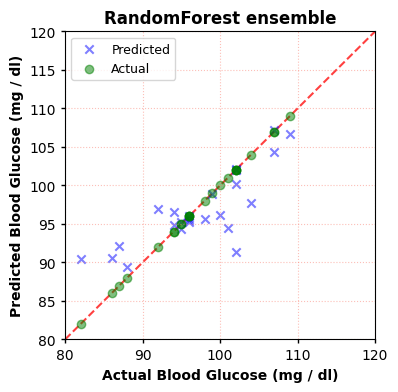

MAE in the Test Subjects using RandomForest ensemble: 2.6959
R^2 in the Test Subjects using RandomForest ensemble: 0.6507
Pearson's correlation coefficient using RandomForest ensemble: 0.8170
P-value: 0.0000
Pearson's correlation coefficient using RandomForest ensemble: 0.8170
P-value: 0.0000


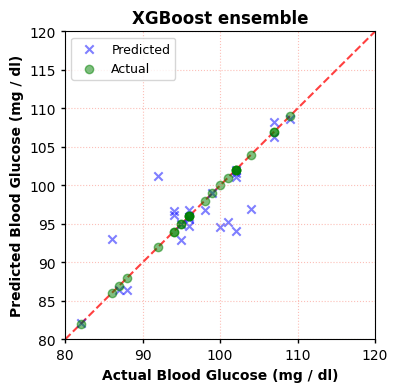

MAE in the Test Subjects using XGBoost ensemble: 2.3656
R^2 in the Test Subjects using XGBoost ensemble: 0.6955
Pearson's correlation coefficient using XGBoost ensemble: 0.8413
P-value: 0.0000
Pearson's correlation coefficient using XGBoost ensemble: 0.8413
P-value: 0.0000


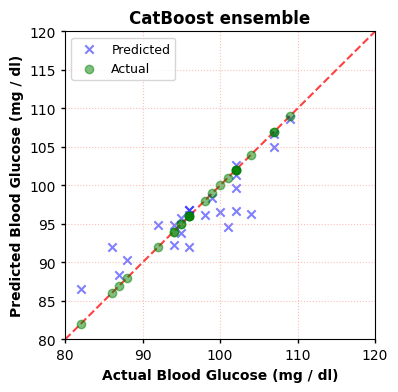

MAE in the Test Subjects using CatBoost ensemble: 2.3596
R^2 in the Test Subjects using CatBoost ensemble: 0.7726
Pearson's correlation coefficient using CatBoost ensemble: 0.8917
P-value: 0.0000
Pearson's correlation coefficient using CatBoost ensemble: 0.8917
P-value: 0.0000


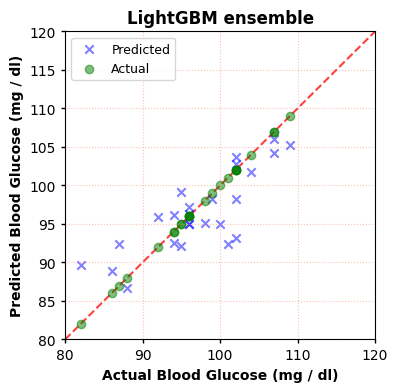

MAE in the Test Subjects using LightGBM ensemble: 3.1000
R^2 in the Test Subjects using LightGBM ensemble: 0.6553
Pearson's correlation coefficient using LightGBM ensemble: 0.8178
P-value: 0.0000
Pearson's correlation coefficient using LightGBM ensemble: 0.8178
P-value: 0.0000


In [ ]:
import numpy as np
from joblib import load

# Load the saved scaler
scaler = load(f'{modelDirectory}npCombinedDataSet_scaled.joblib')

def inverse_scale_target(scaler, y_scaled):
    # Create a dummy array with zeros with the same shape as the original dataset
    dummy = np.zeros((len(y_scaled), X_train.shape[1]+1))
    
    # Replace the last column (target values) with the scaled values
    dummy[:,-1] = y_scaled.ravel()
    
    # Use inverse_transform to scale back to the original range
    y_original = scaler.inverse_transform(dummy)[:,-1]
    
    return y_original


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    
    # Convert the scaled predicted and actual values to their original values
    y_test_original                 = inverse_scale_target(scaler, y_test)
    y_test_pred_ensemble_original   = inverse_scale_target(scaler, y_test_pred_ensemble)
    
    # Scatter plot
    plt.figure(figsize=(4, 4), dpi=100)
    plt.xlim(80, 120)
    plt.ylim(80, 120) 
    plt.scatter(y_test_original, y_test_pred_ensemble_original, alpha=0.5, color='b', label='Predicted', marker='x')
    plt.scatter(y_test_original, y_test_original, alpha=0.5, color='g', label='Actual', marker='o')
    
    # 45-degree line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, '--', alpha=0.75, zorder=0, color='r')
    plt.xlim(lims)
    plt.ylim(lims)

    plt.xlabel('Actual Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.ylabel('Predicted Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.title(f'{model_type} ensemble', fontweight='bold', fontsize=12)
    plt.grid(True, linestyle='dotted', color='salmon', alpha=0.5)
    plt.tick_params(axis='x', labelsize=10, width=1, length=3, direction='out')
    plt.tick_params(axis='y', labelsize=10, width=1, length=3, direction='out')
    plt.legend()
    plt.show()

    mse_ensemble    = mean_squared_error(y_test_original, y_test_pred_ensemble_original)
    mae_ensemble    = mean_absolute_error(y_test_original, y_test_pred_ensemble_original)
    r2              = r2_score(y_test_original, y_test_pred_ensemble_original)
    
    # print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")
    print(f"MAE in the Test Subjects using {model_type} ensemble: {mae_ensemble:.4f}")
    print(f"R^2 in the Test Subjects using {model_type} ensemble: {r2:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")



Model Type: RandomForest
MAE: 2.6959
R^2: 0.6507
Pearson's correlation coefficient: 0.8170
P-value: 0.0000


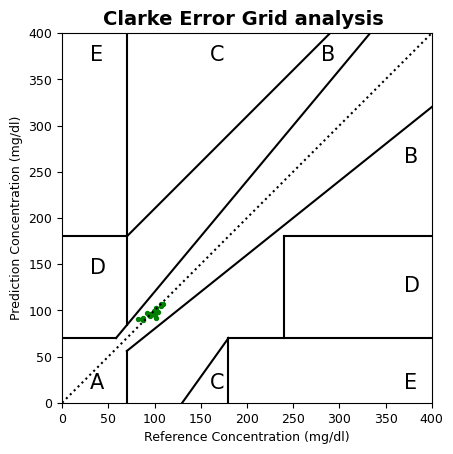


Model Type: XGBoost
MAE: 2.3656
R^2: 0.6955
Pearson's correlation coefficient: 0.8413
P-value: 0.0000


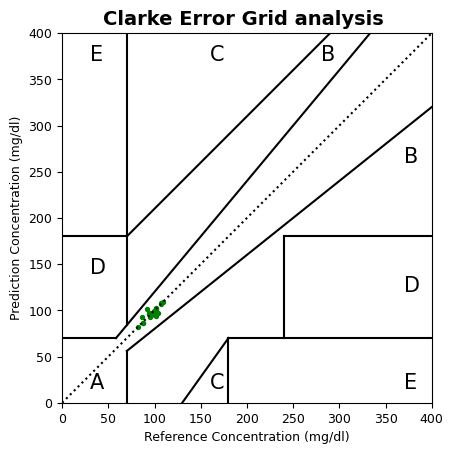


Model Type: CatBoost
MAE: 2.3596
R^2: 0.7726
Pearson's correlation coefficient: 0.8917
P-value: 0.0000


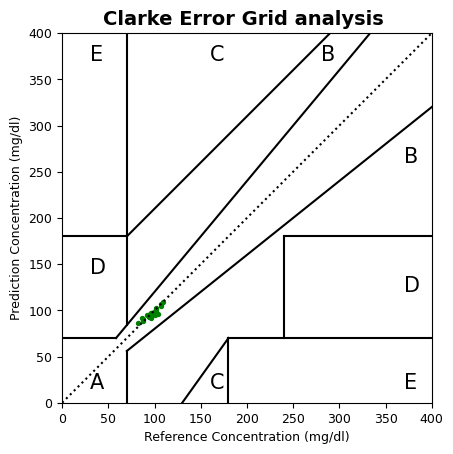


Model Type: LightGBM
MAE: 3.1000
R^2: 0.6553
Pearson's correlation coefficient: 0.8178
P-value: 0.0000


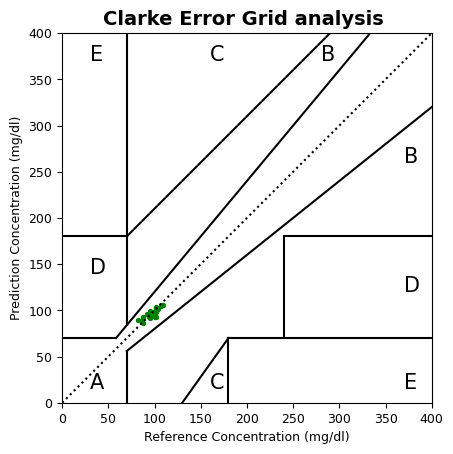

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import load

# Load the saved scaler
scaler = load(f'{modelDirectory}npCombinedDataSet_scaled.joblib')

def inverse_scale_target(scaler, y_scaled):
    dummy = np.zeros((len(y_scaled), X_train.shape[1]+1))
    dummy[:,-1] = y_scaled.ravel()
    y_original = scaler.inverse_transform(dummy)[:,-1]
    return y_original

def clark_error_grid(actual, predicted):
    plt.figure(figsize=(8, 8))
    A = (0, 0.7, 1.3)
    B = (0.7, 1.3, 1.4, 2.8, 3.2, 4)
    C = (1.4, 2.8, 3.2, 4, 5)
    D = (3.2, 4, 5, 15)
    E = (0, 15)
    
    plt.plot([0, 400], [0, 400], ':k')
    plt.plot(A[0:2], A[0:2], '-b', A[1:3], A[1:3], '-b')
    plt.plot(B[0:2], B[2:4], '-g', B[1:3], B[2:4], '-g')
    plt.plot(C[0:2], C[2:4], '-y', C[1:3], C[2:4], '-y')
    plt.plot(D[0:2], D[2:4], '-r', D[1:3], D[2:4], '-r')
    plt.plot(E[0:2], [0, 0], '-r', E[0:2], [400, 400], '-r')
    
    plt.scatter(actual, predicted, marker='o', color='purple', alpha=0.5)
    
    plt.title("Clark Error Grid")
    plt.xlabel("Reference Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()
def clarke_error_grid(ref_values, pred_values):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
#     if max(ref_values) > 400 or max(pred_values) > 400:
#         print "Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values))
#     if min(ref_values) < 0 or min(pred_values) < 0:
#         print "Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values))

    #Clear plot
    plt.clf()

    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='green', s=8)
    plt.title("Clarke Error Grid analysis " , fontsize = 14, fontweight = 'bold')
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))

    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B
    plt.show() 
    return plt, zone

for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    y_test_original = inverse_scale_target(scaler, y_test)
    y_test_pred_ensemble_original = inverse_scale_target(scaler, y_test_pred_ensemble)
    
    mse_ensemble = mean_squared_error(y_test_original, y_test_pred_ensemble_original)
    mae_ensemble = mean_absolute_error(y_test_original, y_test_pred_ensemble_original)
    r2 = r2_score(y_test_original, y_test_pred_ensemble_original)
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    
    print(f"\nModel Type: {model_type}")
    print(f"MAE: {mae_ensemble:.4f}")
    print(f"R^2: {r2:.4f}")
    print(f"Pearson's correlation coefficient: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Clark Error Grid visualization
    clarke_error_grid(y_test_original, y_test_pred_ensemble_original)


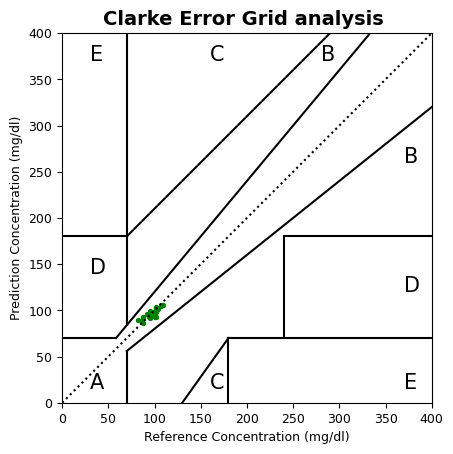

(<module 'matplotlib.pyplot' from 'C:\\Users\\rbm\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>,
 [25, 0, 0, 0, 0])

In [ ]:
clarke_error_grid(y_test_original, y_test_pred_ensemble_original)

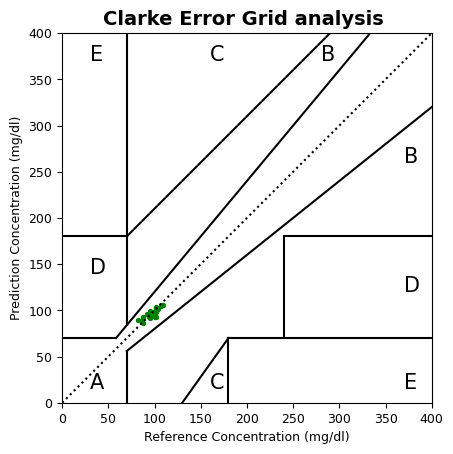

(<module 'matplotlib.pyplot' from 'C:\\Users\\rbm\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>,
 [25, 0, 0, 0, 0])

In [ ]:
clarke_error_grid(y_test_original, y_test_pred_ensemble_original)

# previous 

In [ ]:
npDataSet

array([1.95657462e+00, 6.06298930e+00, 1.39945193e+00, 7.22851234e+07,
       3.11253543e-03, 2.33868655e+03, 1.19696071e+05, 5.57719896e+06,
       1.05045049e+00, 2.49233165e+02, 8.60000000e+01])

In [ ]:
# npCombinedDataSet[117]

In [ ]:
npCombinedDataSet.shape

(150, 11)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming npCombinedDataSet is already defined with shape (118, 55)

# Scale all data
scaler = StandardScaler()
npCombinedDataSet_scaled = scaler.fit_transform(npCombinedDataSet)

# Saving the scaler for future use
# modelDirectory = "your_model_directory_path_here"  # Set this to your model directory path
dump(scaler, f'{modelDirectory}npCombinedDataSet_scaled.joblib')

# Define the split ratio
split_ratio = 0.85

# Calculate the number of samples for training
num_train_samples = int(split_ratio * npCombinedDataSet_scaled.shape[0])
num_train_samples = 125

# Split the data using the computed number of samples for training
X_train = npCombinedDataSet_scaled[:num_train_samples, :-1]
X_test  = npCombinedDataSet_scaled[num_train_samples:, :-1]
y_train = npCombinedDataSet_scaled[:num_train_samples, -1:]
y_test  = npCombinedDataSet_scaled[num_train_samples:, -1:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 10)
(125, 1)
(25, 10)
(25, 1)


# __<u> Training ML Models </u>__
- Leave One Out Approach
- 4 Models : `RandomForest`, `XGBoost`, `CatBoost` & `LightGBM`

In [ ]:
from collections import defaultdict
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from joblib import dump

# Define the models to be trained
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(verbose=-1, force_col_wise=True) # Suppress LightGBM messages and set force_col_wise=True
}


model_performances = defaultdict(list)
model_lists = defaultdict(list)

loo = LeaveOneOut()
num_epochs = loo.get_n_splits(X_train)

for model_name, base_model in models.items():
    mse_values_for_model = []

    for epoch, (train_idx, test_idx) in enumerate(loo.split(X_train), start=1):
        X_loo_train, X_loo_test = X_train[train_idx], X_train[test_idx]
        y_loo_train, y_loo_test = y_train[train_idx].ravel(), y_train[test_idx].ravel()  # Use ravel() here
        
        model = deepcopy(base_model)
        model.fit(X_loo_train, y_loo_train)
        
        y_loo_pred = model.predict(X_loo_test)
        mse_loo = mean_squared_error(y_loo_test, y_loo_pred)
        
        mse_values_for_model.append(mse_loo)
        model_lists[model_name].append(model)

        print(f"Training {model_name} - Epoch {epoch}/{num_epochs} - Current MSE: {mse_loo:.4f}", end="\r", flush=True)

    average_mse = sum(mse_values_for_model) / len(mse_values_for_model)
    model_performances[model_name].extend(mse_values_for_model)  # Store list of MSE values for each model
    
    print(f"\nAverage MSE for {model_name} with LOOCV: {average_mse:.4f}")
    print("-" * 50)

dump(model_performances,    f'{bigFileDirectory}model_performances.joblib')
dump(model_lists,           f'{bigFileDirectory}model_lists.joblib')

Training RandomForest - Epoch 125/125 - Current MSE: 0.2695
Average MSE for RandomForest with LOOCV: 0.5197
--------------------------------------------------
Training XGBoost - Epoch 125/125 - Current MSE: 0.5339
Average MSE for XGBoost with LOOCV: 0.5526
--------------------------------------------------
Training CatBoost - Epoch 125/125 - Current MSE: 0.4803
Average MSE for CatBoost with LOOCV: 0.3596
--------------------------------------------------
Training LightGBM - Epoch 125/125 - Current MSE: 0.6274
Average MSE for LightGBM with LOOCV: 0.5158
--------------------------------------------------


['../BigFile/model_lists.joblib']

# __<u>Innovation</u>__
- weighted_ensemble_predict

In [ ]:
model_performances  = load(f'{bigFileDirectory}model_performances.joblib')
model_lists         = load(f'{bigFileDirectory}model_lists.joblib')


def weighted_ensemble_predict(X, models, performances):
    total_weights = sum([1 / mse for mse in performances])
    predictions = np.zeros(X.shape[0])
    for model, mse in zip(models, performances):
        weight = (1 / mse) / total_weights
        predictions += weight * model.predict(X)
    return predictions


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    mse_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)
    print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")

MSE in the Test Subjects using RandomForest ensemble: 0.3505
MSE in the Test Subjects using XGBoost ensemble: 0.3045
MSE in the Test Subjects using CatBoost ensemble: 0.2274
MSE in the Test Subjects using LightGBM ensemble: 0.3447


In [ ]:
from joblib import load
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

model_performances  = load(f'{bigFileDirectory}model_performances.joblib')
model_lists         = load(f'{bigFileDirectory}model_lists.joblib')

def weighted_ensemble_predict(X, models, performances):
    total_weights = sum([1 / mse for mse in performances])
    predictions = np.zeros(X.shape[0])
    for model, mse in zip(models, performances):
        weight = (1 / mse) / total_weights
        predictions += weight * model.predict(X)
    return predictions

for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    mse_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)

    
    print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")
 

MSE in the Test Subjects using RandomForest ensemble: 0.3505
MSE in the Test Subjects using XGBoost ensemble: 0.3045
MSE in the Test Subjects using CatBoost ensemble: 0.2274
MSE in the Test Subjects using LightGBM ensemble: 0.3447


# feature importance/ Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Define the models you want to use with RFE
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(verbose=-1, force_col_wise=True)
}

# Assuming you have some data X_train, y_train:
# X_train, y_train = ...  # Your data loading here

selected_features_per_model = {}

# Perform RFE for each model
for model_name, model in models.items():
    print(f"Running RFECV for {model_name}...")
    selector = RFECV(model, step=1, cv=5)  # Here, cv=5 means 5-fold cross-validation
    selector = selector.fit(X_train, y_train)
    
    # Store selected features for each model
    selected_features_per_model[model_name] = np.array(feature_names)[selector.support_]
    
    # Visualize the ranking of features
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Importance using RFE - {model_name}")
    plt.bar(range(len(feature_names)), selector.ranking_)
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.ylabel("Ranking (Lower is better)")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.show()

for model_name, selected_features in selected_features_per_model.items():
    print(f"Selected features for {model_name}: {selected_features}")


Running RFECV for RandomForest...


C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array

C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\rbm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array

NameError: name 'feature_names' is not defined

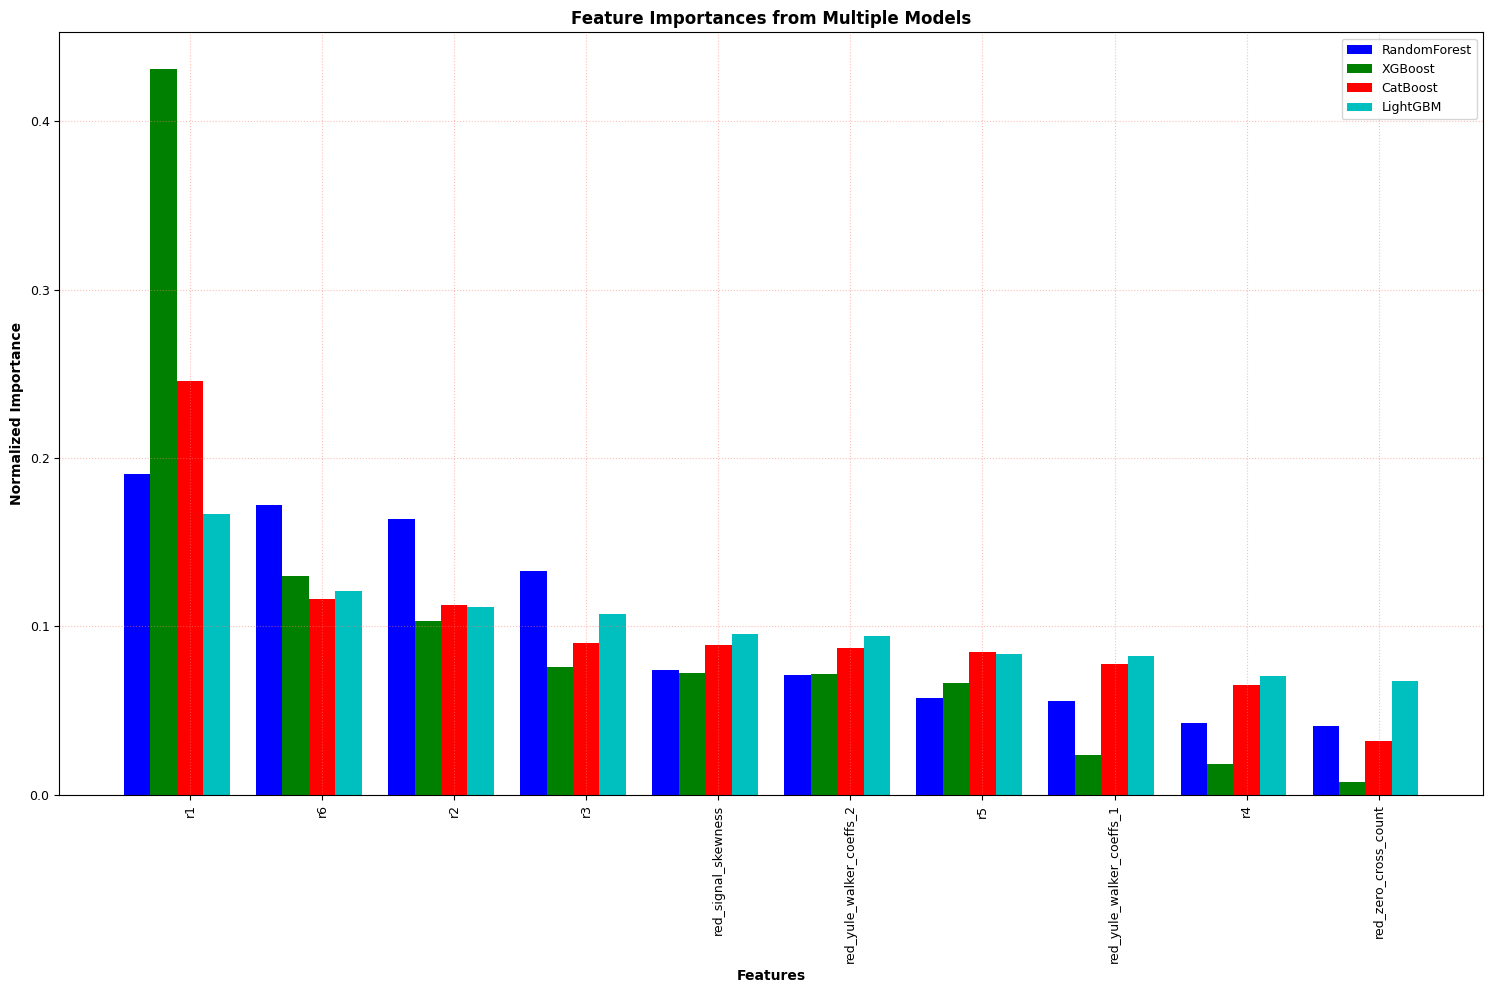

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature names
general_features = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6']

color_features = [
    'yule_walker_coeffs_1',
    'yule_walker_coeffs_2',
    'zero_cross_count',
    'signal_skewness',
    'mean_wavelet_amplitude',
    'signal_autocorrelation',
    'spectral_kurtosis_value',
    'spectral_skewness_value',
    'sum_absolute_difference',
    'psd_kurtosis',
    'psd_mean',
    'psd_variance',
    'kte_skewness',
    'kte_kurtosis',
    'kte_mean',
    'kte_variance'
]

colors = ['red', 'green', 'blue']

feature_names = general_features + [f"{color}_{feature}" for color in colors for feature in color_features]

def get_average_importance(models, model_type):
    """ Get average feature importance across all models """
    all_importances = []
    for model in models:
        if model_type in ["RandomForest", "XGBoost", "LightGBM"]:
            all_importances.append(model.feature_importances_)
        elif model_type == "CatBoost":
            all_importances.append(model.get_feature_importance())
        else:
            raise ValueError(f"Unknown model type: {model_type}")
    return np.mean(all_importances, axis=0)

def get_overall_average_importance(importances_dict):
    """Compute the overall average importance across models."""
    importances = list(importances_dict.values())
    return np.mean(importances, axis=0)

def reorder_features_by_importance(importances, feature_names):
    """Reorder features based on their importances."""
    order = np.argsort(importances)[::-1]  # [::-1] for descending order
    reordered_importances = importances[order]
    reordered_feature_names = np.array(feature_names)[order]
    return reordered_importances, list(reordered_feature_names)

def plot_all_feature_importances(importances_dict, reordered_feature_names):
    """ Plot feature importances from multiple models on the same graph """
    n_features = len(reordered_feature_names)
    bar_width = 0.2
    model_colors = ['b', 'g', 'r', 'c', 'm']

    plt.figure(figsize=(15, 10))

    for idx, (model_type, importance) in enumerate(importances_dict.items()):
        normalized_importance = importance / np.sum(importance)
        normalized_importance = normalized_importance[np.argsort(importance)[::-1]]
        r = np.arange(n_features)
        plt.bar(r + idx*bar_width, normalized_importance, color=model_colors[idx], width=bar_width, label=model_type)

    plt.xticks(r + 2*bar_width, reordered_feature_names, rotation=90)  # Rotate x-axis labels for readability
    plt.ylabel('Normalized Importance', fontweight='bold', fontsize=10)
    plt.xlabel('Features', fontweight='bold', fontsize=10)
    plt.title('Feature Importances from Multiple Models', fontweight='bold', fontsize=12)
    plt.grid(True, linestyle='dotted', color='salmon', alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Fetch feature importances from the trained models:
importances_dict = {}
for model_type in models.keys():
    avg_importance = get_average_importance(model_lists[model_type], model_type)
    importances_dict[model_type] = avg_importance

# Get the overall average importance across all models
overall_avg_importance = get_overall_average_importance(importances_dict)

# Reorder features based on the overall average importance
reordered_importances, reordered_feature_names = reorder_features_by_importance(overall_avg_importance, feature_names)

# Plot reordered features
plot_all_feature_importances(importances_dict, reordered_feature_names)

In [ ]:
import shap

# Train your model (e.g., RandomForest)
model = RandomForestRegressor().fit(X_train, y_train)

# Create explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)


In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


# __<u>Evaluation</u>__

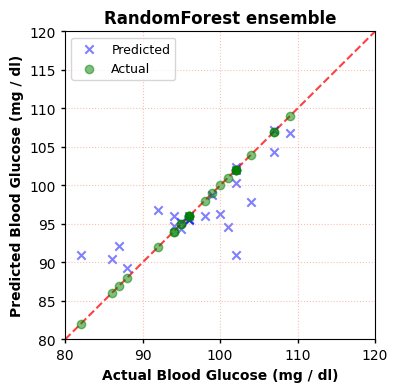

MAE in the Test Subjects using RandomForest ensemble: 2.6411
R^2 in the Test Subjects using RandomForest ensemble: 0.6495
Pearson's correlation coefficient using RandomForest ensemble: 0.8152
P-value: 0.0000
Pearson's correlation coefficient using RandomForest ensemble: 0.8152
P-value: 0.0000


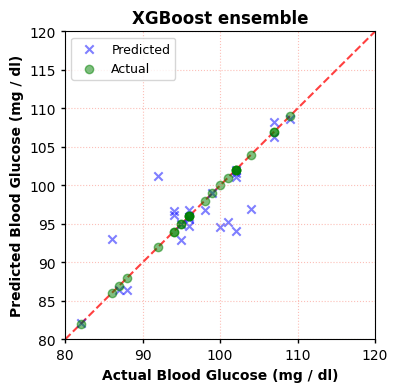

MAE in the Test Subjects using XGBoost ensemble: 2.3656
R^2 in the Test Subjects using XGBoost ensemble: 0.6955
Pearson's correlation coefficient using XGBoost ensemble: 0.8413
P-value: 0.0000
Pearson's correlation coefficient using XGBoost ensemble: 0.8413
P-value: 0.0000


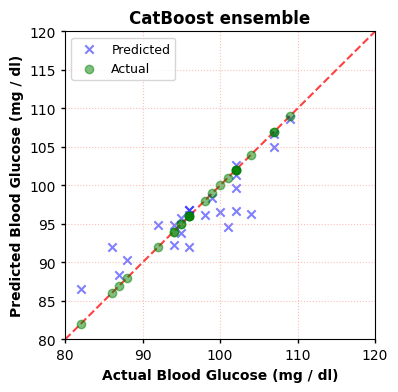

MAE in the Test Subjects using CatBoost ensemble: 2.3596
R^2 in the Test Subjects using CatBoost ensemble: 0.7726
Pearson's correlation coefficient using CatBoost ensemble: 0.8917
P-value: 0.0000
Pearson's correlation coefficient using CatBoost ensemble: 0.8917
P-value: 0.0000


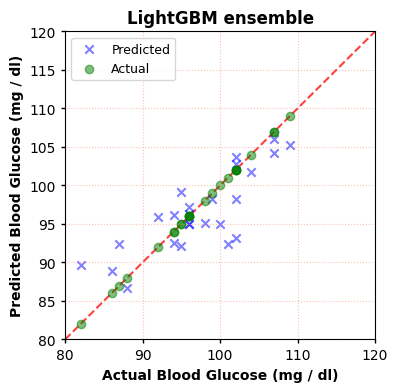

MAE in the Test Subjects using LightGBM ensemble: 3.1000
R^2 in the Test Subjects using LightGBM ensemble: 0.6553
Pearson's correlation coefficient using LightGBM ensemble: 0.8178
P-value: 0.0000
Pearson's correlation coefficient using LightGBM ensemble: 0.8178
P-value: 0.0000


In [ ]:
import numpy as np
from joblib import load

# Load the saved scaler
scaler = load(f'{modelDirectory}npCombinedDataSet_scaled.joblib')

def inverse_scale_target(scaler, y_scaled):
    # Create a dummy array with zeros with the same shape as the original dataset
    dummy = np.zeros((len(y_scaled), X_train.shape[1]+1))
    
    # Replace the last column (target values) with the scaled values
    dummy[:,-1] = y_scaled.ravel()
    
    # Use inverse_transform to scale back to the original range
    y_original = scaler.inverse_transform(dummy)[:,-1]
    
    return y_original


for model_type in models.keys():
    y_test_pred_ensemble = weighted_ensemble_predict(X_test, model_lists[model_type], model_performances[model_type])
    
    # Convert the scaled predicted and actual values to their original values
    y_test_original                 = inverse_scale_target(scaler, y_test)
    y_test_pred_ensemble_original   = inverse_scale_target(scaler, y_test_pred_ensemble)
    
    # Scatter plot
    plt.figure(figsize=(4, 4), dpi=100)
    plt.xlim(80, 120)
    plt.ylim(80, 120) 
    plt.scatter(y_test_original, y_test_pred_ensemble_original, alpha=0.5, color='b', label='Predicted', marker='x')
    plt.scatter(y_test_original, y_test_original, alpha=0.5, color='g', label='Actual', marker='o')
    
    # 45-degree line
    lims = [
        np.min([plt.xlim(), plt.ylim()]),  # min of both axes
        np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, '--', alpha=0.75, zorder=0, color='r')
    plt.xlim(lims)
    plt.ylim(lims)

    plt.xlabel('Actual Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.ylabel('Predicted Blood Glucose (mg / dl)', fontweight='bold', fontsize=10)
    plt.title(f'{model_type} ensemble', fontweight='bold', fontsize=12)
    plt.grid(True, linestyle='dotted', color='salmon', alpha=0.5)
    plt.tick_params(axis='x', labelsize=10, width=1, length=3, direction='out')
    plt.tick_params(axis='y', labelsize=10, width=1, length=3, direction='out')
    plt.legend()
    plt.show()

    mse_ensemble    = mean_squared_error(y_test_original, y_test_pred_ensemble_original)
    mae_ensemble    = mean_absolute_error(y_test_original, y_test_pred_ensemble_original)
    r2              = r2_score(y_test_original, y_test_pred_ensemble_original)
    
    # print(f"MSE in the Test Subjects using {model_type} ensemble: {mse_ensemble:.4f}")
    print(f"MAE in the Test Subjects using {model_type} ensemble: {mae_ensemble:.4f}")
    print(f"R^2 in the Test Subjects using {model_type} ensemble: {r2:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    pearson_coefficient, p_value = pearsonr(y_test_original, y_test_pred_ensemble_original)
    print(f"Pearson's correlation coefficient using {model_type} ensemble: {pearson_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
